In [187]:
#Importo librerias
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind

#Set de datos utilizado para el proyecto de Fraude 

df = pd.read_csv('transaction_dataset.csv')
print(df.shape)
df.head()

(9841, 51)


,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [82]:
#Info generica del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [83]:
#Genero estadisticas simples
df.describe()

,Unnamed: 0,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,4920.000000,1815.049893,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,2840.996333,1222.621830,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,2460.000000,821.000000,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,4920.000000,1641.000000,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,7380.000000,2601.000000,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,9840.000000,4729.000000,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [84]:
#Muestro la cantidad de valores unicos por columna
for col in df:
    print(f'{col} : {len(df[col].unique())}')

Unnamed: 0 : 9841
Index : 4729
Address : 9816
FLAG : 2
Avg min between sent tnx : 5013
Avg min between received tnx : 6223
Time Diff between first and last (Mins) : 7810
Sent tnx : 641
Received Tnx : 727
Number of Created Contracts : 20
Unique Received From Addresses : 256
Unique Sent To Addresses : 258
min value received : 4589
max value received  : 6302
avg val received : 6767
min val sent : 4719
max val sent : 6647
avg val sent : 5854
min value sent to contract : 3
max val sent to contract : 4
avg value sent to contract : 4
total transactions (including tnx to create contract : 897
total Ether sent : 5868
total ether received : 6728
total ether sent contracts : 4
total ether balance : 5717
 Total ERC20 tnxs : 301
 ERC20 total Ether received : 3461
 ERC20 total ether sent : 1416
 ERC20 total Ether sent contract : 30
 ERC20 uniq sent addr : 108
 ERC20 uniq rec addr : 148
 ERC20 uniq sent addr.1 : 5
 ERC20 uniq rec contract addr : 124
 ERC20 avg time between sent tnx : 2
 ERC20 avg tim

In [85]:
#Chequeo la cantidad de valores NaN por columna 
df.isnull().sum()


Unnamed: 0                                                0
Index                                                     0
Address                                                   0
FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                            

In [86]:
# Chequeo la cantidad de "Fraude" o "No fradude" que tiene la columna "Flag"
print(df['FLAG'].value_counts())


0    7662
1    2179
Name: FLAG, dtype: int64


# Limpieza de datos 

In [87]:
#cambiar los valores 0 a nulos, porque un valor 0 no significa nada en las variables categóricas
df[' ERC20_most_rec_token_type'].replace({'0':np.NaN},inplace = True)
df[' ERC20 most sent token type'].replace({'0':np.NaN},inplace = True)

In [88]:
#Promedio de Nan
print(df[' ERC20 most sent token type'].isnull().sum()/len(df))
print(df[' ERC20 most sent token type'].max)

0.5324662127832538
<bound method NDFrame._add_numeric_operations.<locals>.max of 0            Cofoundit
1       Livepeer Token
2                 None
3               Raiden
4        StatusNetwork
             ...      
9836                  
9837                  
9838                  
9839               NaN
9840                  
Name:  ERC20 most sent token type, Length: 9841, dtype: object>


In [89]:
##Promedio de Nan
print(df[' ERC20_most_rec_token_type'].isnull().sum()/len(df))
print(df[' ERC20_most_rec_token_type'].max)

0.5334823696778782
<bound method NDFrame._add_numeric_operations.<locals>.max of 0                              Numeraire
1                         Livepeer Token
2                                  XENON
3                                  XENON
4                                    EOS
                      ...               
9836                          GSENetwork
9837               Blockwell say NOTSAFU
9838    Free BOB Tokens - BobsRepair.com
9839                                 NaN
9840                          INS Promo1
Name:  ERC20_most_rec_token_type, Length: 9841, dtype: object>


# Analisis Target

Text(0.5, 1.0, 'Distribucion de la columna Target')

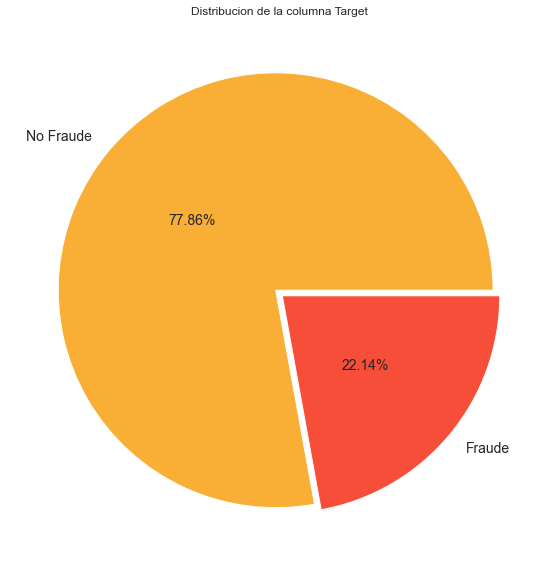

In [90]:
pie, ax = plt.subplots(figsize=[15,10])
labels = ['No Fraude', 'Fraude']
colors = ['#f9ae35', '#f64e38']
plt.pie(x = df['FLAG'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Distribucion de la columna Target')


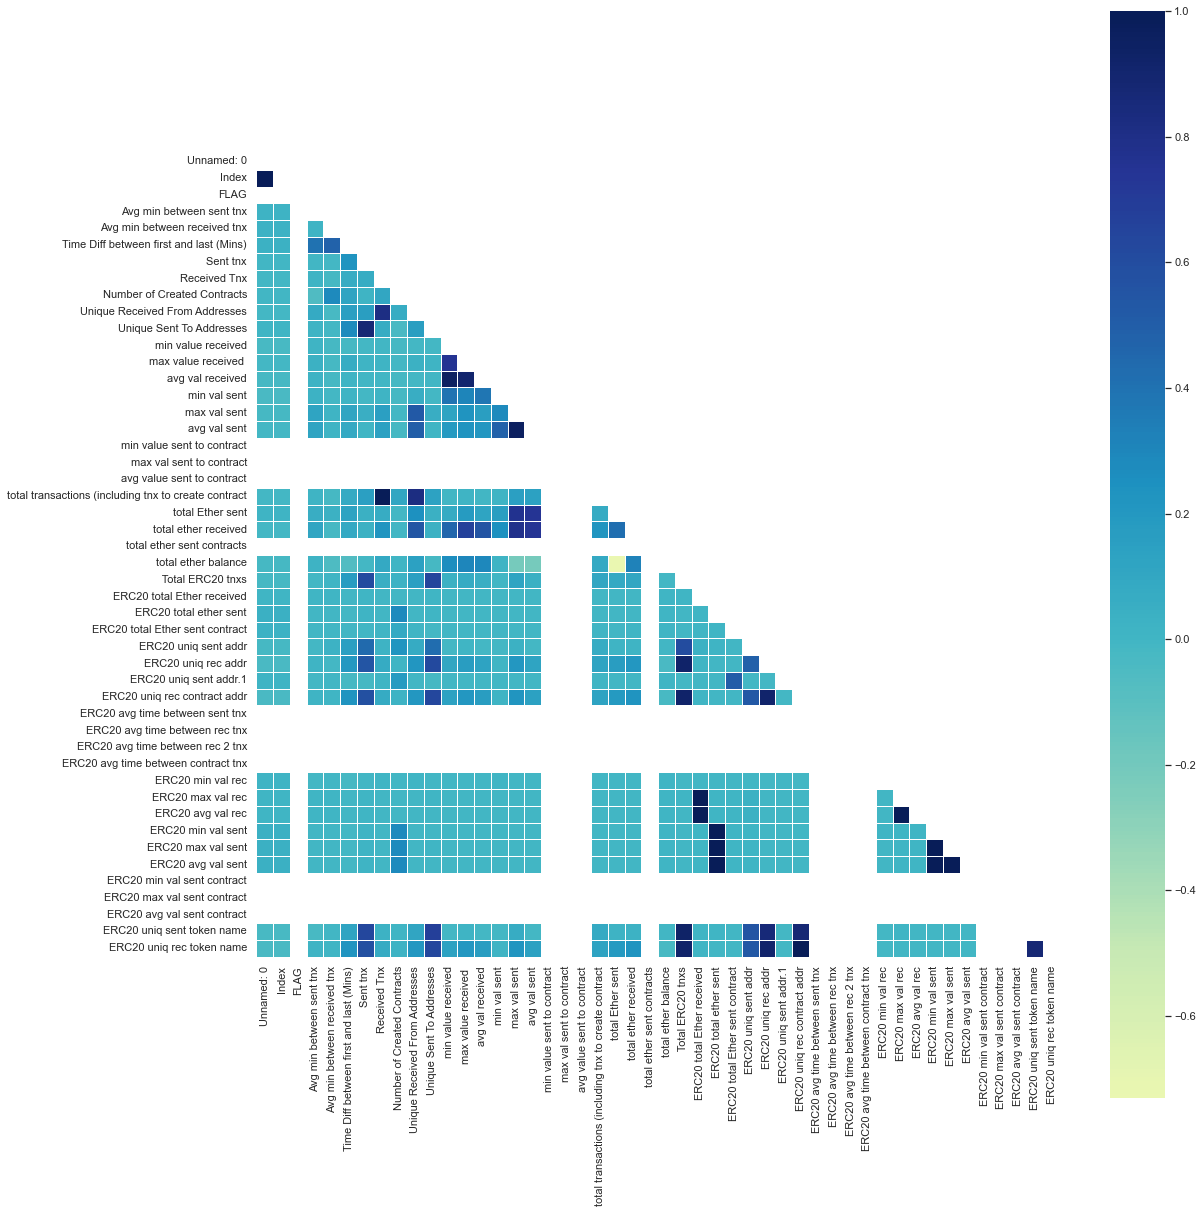

In [91]:
# Correlacion para Fraudes
df_fraud = df[df['FLAG']==1]
corr = df_fraud.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,20))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='YlGnBu',center=0, linewidths=0.8, square=True)

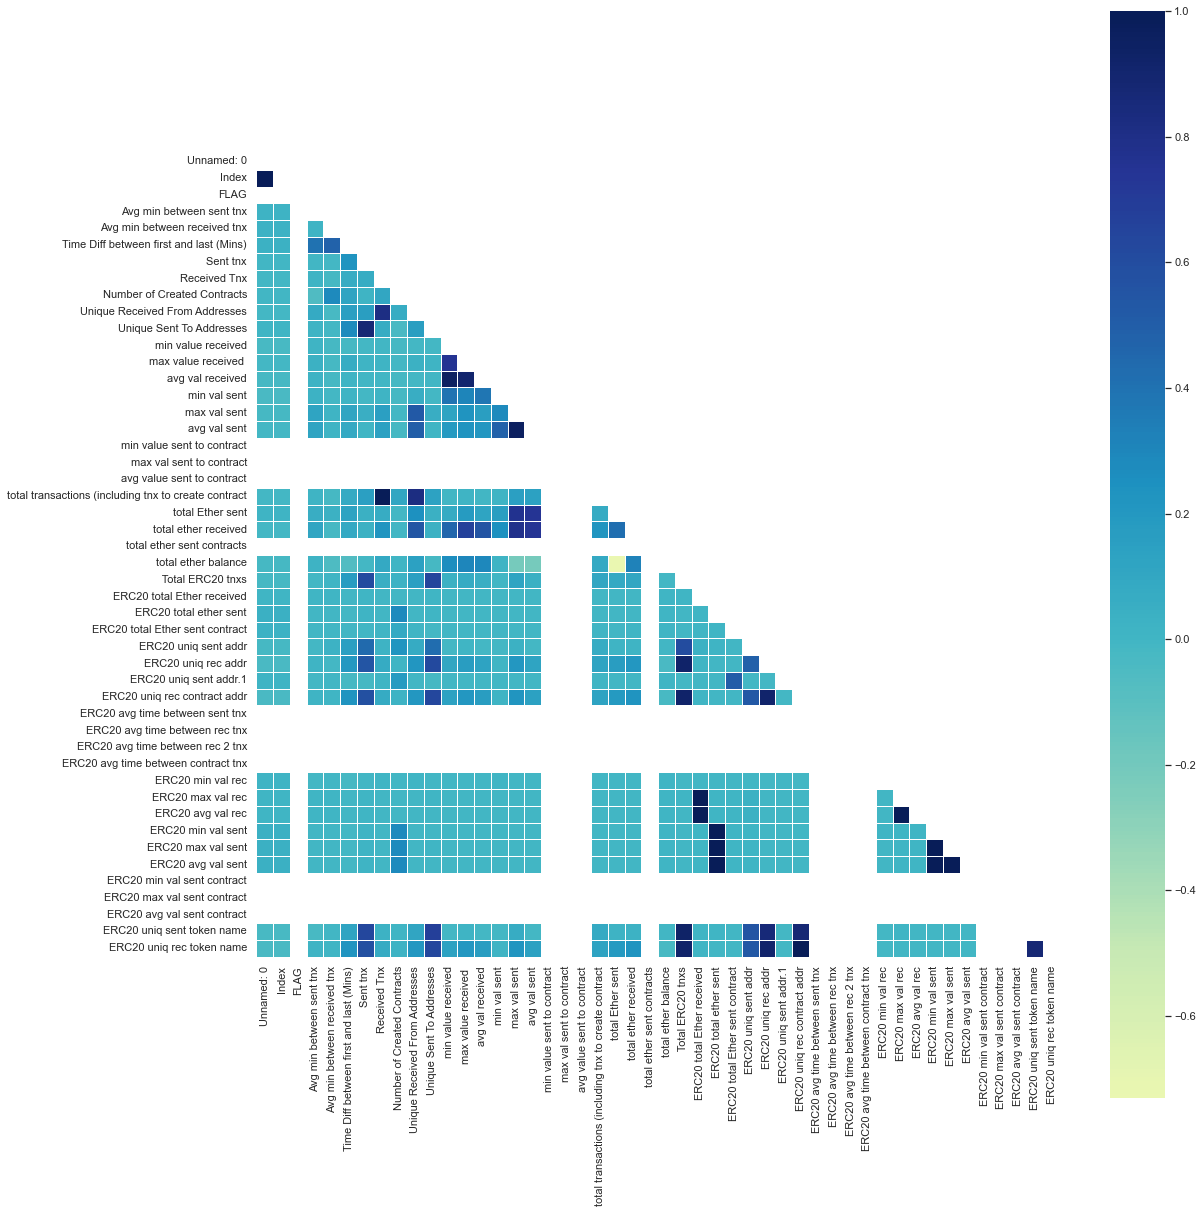

In [92]:
# Correlacion para NO Fraudes
df_not_fraud = df[df['FLAG']==0]
corr = df_fraud.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,20))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='YlGnBu',center=0, linewidths=0.8, square=True)

In [93]:
print(f'Procentaje de transacciones no fraudulentas : {len(df.loc[df["FLAG"]==0])/len(df["FLAG"])*100}')
print(f'Procentaje de transacciones fraudulentas : {len(df.loc[df["FLAG"]==1])/len(df["FLAG"])*100}')

Procentaje de transacciones no fraudulentas : 77.85794126613149
Procentaje de transacciones fraudulentas : 22.14205873386851


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Index'}>,
        <AxesSubplot:title={'center':'FLAG'}>,
        <AxesSubplot:title={'center':'Avg min between sent tnx'}>,
        <AxesSubplot:title={'center':'Avg min between received tnx'}>,
        <AxesSubplot:title={'center':'Time Diff between first and last (Mins)'}>,
        <AxesSubplot:title={'center':'Sent tnx'}>],
       [<AxesSubplot:title={'center':'Received Tnx'}>,
        <AxesSubplot:title={'center':'Number of Created Contracts'}>,
        <AxesSubplot:title={'center':'Unique Received From Addresses'}>,
        <AxesSubplot:title={'center':'Unique Sent To Addresses'}>,
        <AxesSubplot:title={'center':'min value received'}>,
        <AxesSubplot:title={'center':'max value received '}>,
        <AxesSubplot:title={'center':'avg val received'}>],
       [<AxesSubplot:title={'center':'min val sent'}>,
        <AxesSubplot:title={'center':'max val sent'}>,
        <AxesSubplot:t

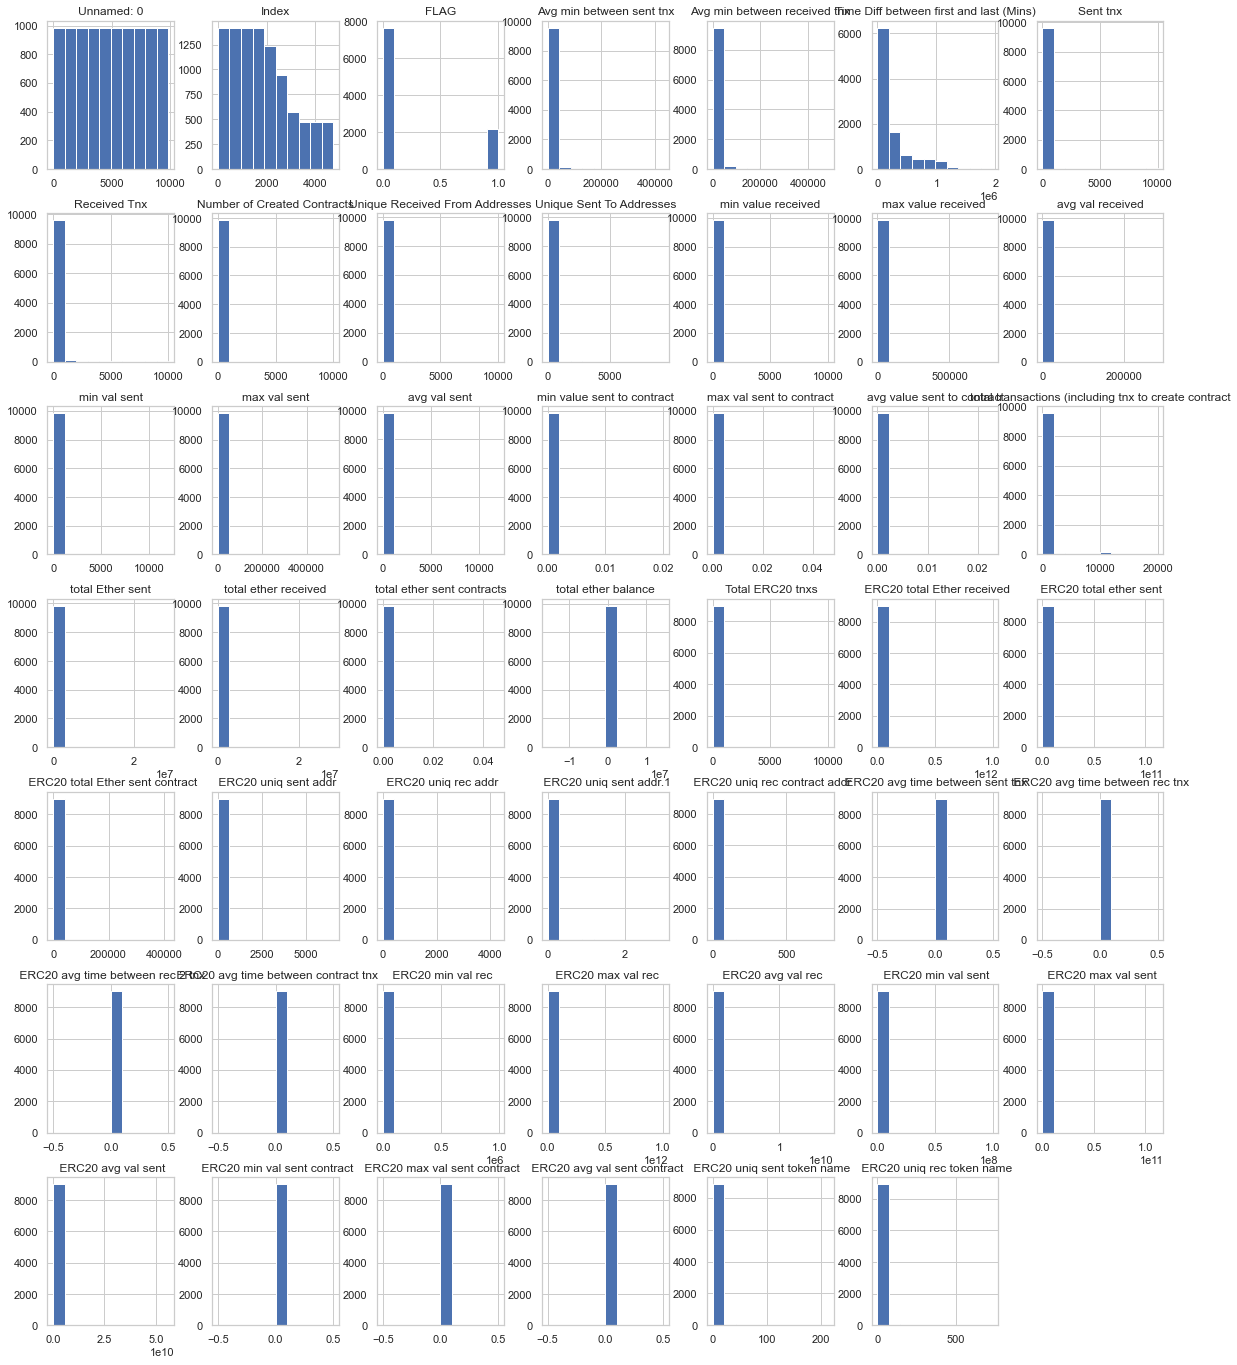

In [94]:
#Genero un grafico para columna , en la cual puedo observar la cantidad de sus distintos valores.
df.hist(figsize=(20,24))

In [95]:
#dropeamos las columnas que tienen valores insignificativos
df.columns


Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 

In [96]:
#Dropeamos las columnas que son insignificativas y no aportan valores. 
columns = ['max val sent to contract','avg value sent to contract','total ether sent contracts',' ERC20 total Ether sent contract',' ERC20 uniq sent addr.1',' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx',' ERC20 avg time between rec 2 tnx',' ERC20 avg time between contract tnx',' ERC20 min val sent contract', ' ERC20 max val sent contract',' ERC20 avg val sent contract']
df_copy = df
df.drop(columns, axis =1 , inplace = True)



In [97]:
df.columns

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 uniq sent addr',
       ' ERC20 uniq rec addr', ' ERC20 uniq rec contract addr',
       ' ERC20 min val rec', ' ERC20 max val rec', ' ERC20 avg val rec',
       ' ERC20 min val sent', ' ERC20 max val sent', ' ERC20 avg val sent',
       ' ERC20 uniq sent token name', ' ERC20 uniq rec token name',
      

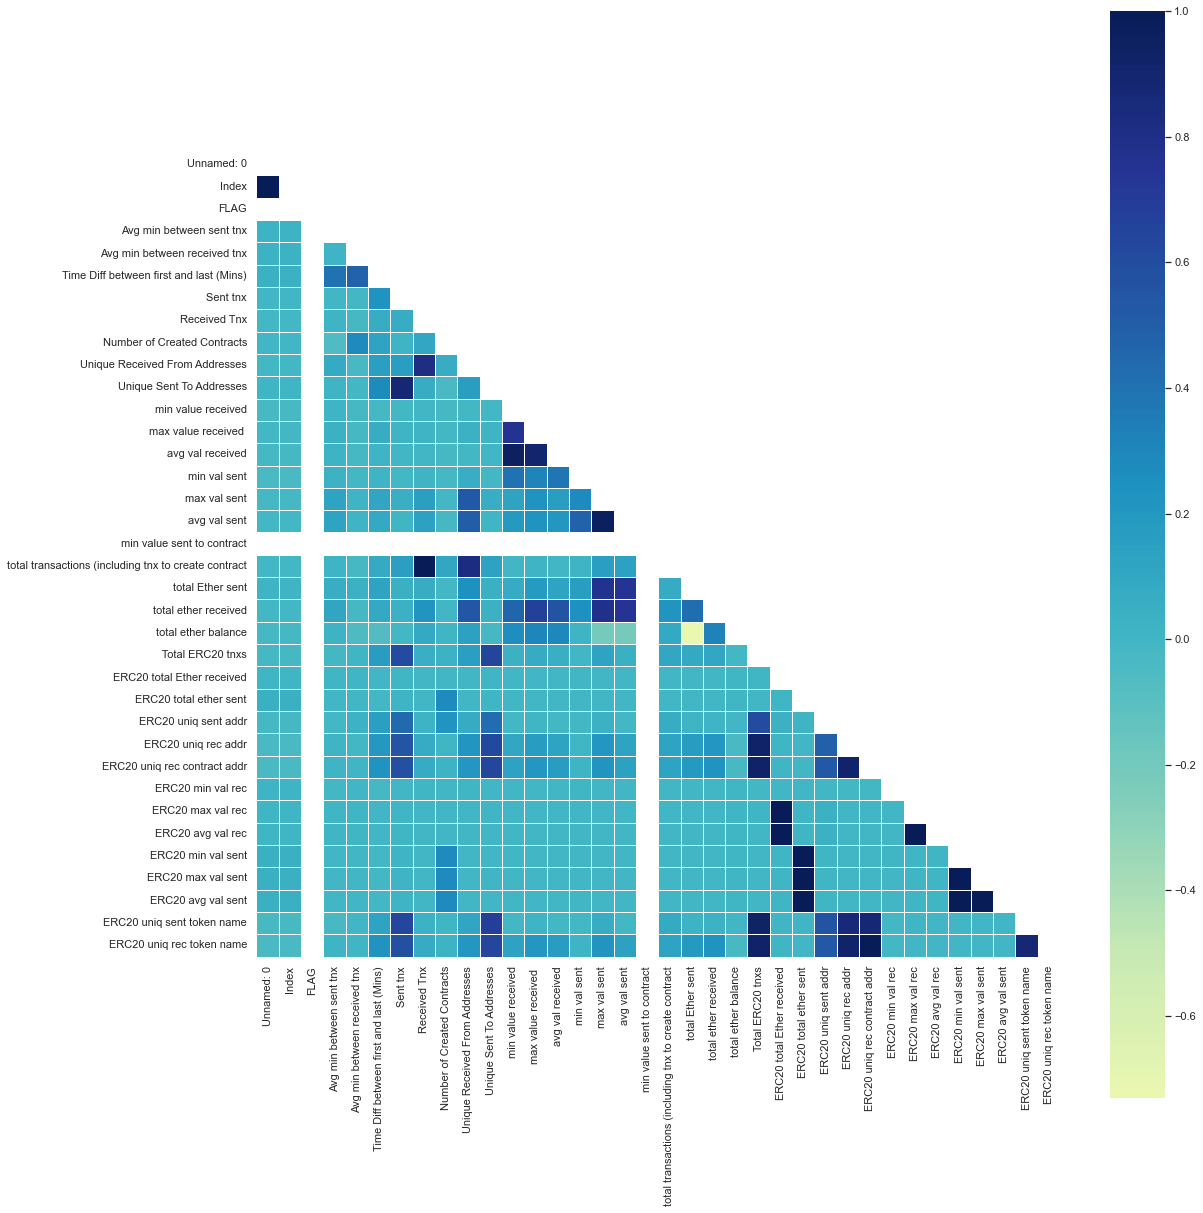

In [98]:
# Correlacion para Fraudes con las columnas limpias
df_fraud = df[df['FLAG']==1]
corr = df_fraud.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,20))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='YlGnBu',center=0, linewidths=0.8, square=True)

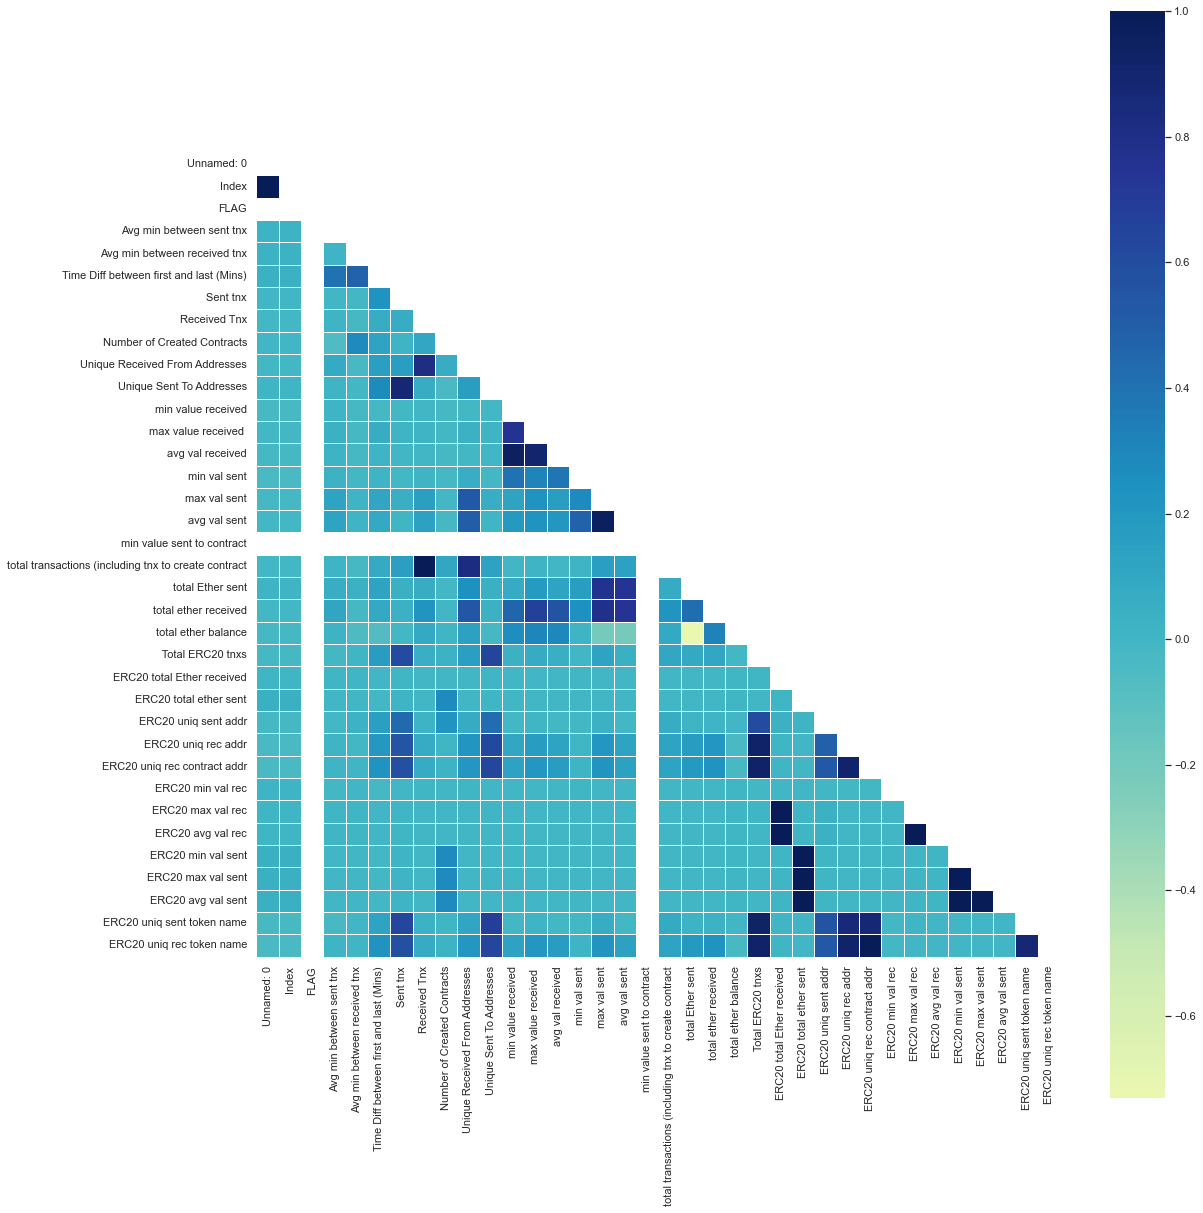

In [99]:
# Correlacion para NO Fraudes con las columnas limpias
df_not_fraud = df[df['FLAG']==0]
corr = df_fraud.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,20))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='YlGnBu',center=0, linewidths=0.8, square=True)

# ANALISIS UNIVARIADO


In [100]:
# ERC20 most sent token type
frec = df[' ERC20 most sent token type'].value_counts()
frec_df = pd.DataFrame(frec)
frec_df.rename(columns={' ERC20 most sent token type':'Frec_abs'},inplace=True)
#Obtenemos los valores de las Frecuencias Absolutas
Frec_abs_val = frec_df["Frec_abs"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias absolutas acumuladas
acum = []

#Iniciamos una variable en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias absolutas para irlas sumando
for i in Frec_abs_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_abs_acum"] = acum

#Calculamos la Frecuencia Relativa en %
frec_df["frec_rel_%"] = 100 * frec_df["Frec_abs"]/len(df[' ERC20 most sent token type'])

#Obtenemos los valores de las Frecuencias Relativas
Frec_rel_val = frec_df["frec_rel_%"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias relativas acumuladas
acum = []

#Iniciamos una variable  en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias relativas para irlas sumando
for i in Frec_rel_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_rel_%_acum"] = acum
frec_df

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
None,1856,1856,18.859872,18.859872
,1191,3047,12.102429,30.962301
EOS,138,3185,1.402297,32.364597
OmiseGO,137,3322,1.392135,33.756732
Golem,130,3452,1.321004,35.077736
...,...,...,...,...
BlockchainPoland,1,4597,0.010162,46.712732
Covalent Token,1,4598,0.010162,46.722894
Nebula AI Token,1,4599,0.010162,46.733056
Blocktix,1,4600,0.010162,46.743217


In [101]:
#' ERC20 most sent token type'
frec = df[' ERC20_most_rec_token_type'].value_counts()
frec_df = pd.DataFrame(frec)
frec_df.rename(columns={' ERC20_most_rec_token_type':'Frec_abs'},inplace=True)
#Obtenemos los valores de las Frecuencias Absolutas
Frec_abs_val = frec_df["Frec_abs"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias absolutas acumuladas
acum = []

#Iniciamos una variable en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias absolutas para irlas sumando
for i in Frec_abs_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_abs_acum"] = acum

#Calculamos la Frecuencia Relativa en %
frec_df["frec_rel_%"] = 100 * frec_df["Frec_abs"]/len(df[' ERC20_most_rec_token_type'])

#Obtenemos los valores de las Frecuencias Relativas
Frec_rel_val = frec_df["frec_rel_%"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias relativas acumuladas
acum = []

#Iniciamos una variable  en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias relativas para irlas sumando
for i in Frec_rel_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_rel_%_acum"] = acum
frec_df

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
OmiseGO,873,873,8.871050,8.871050
Blockwell say NOTSAFU,779,1652,7.915862,16.786912
DATAcoin,358,2010,3.637842,20.424754
Livepeer Token,207,2217,2.103445,22.528198
EOS,161,2378,1.636013,24.164211
...,...,...,...,...
BCDN,1,4587,0.010162,46.611117
Egretia,1,4588,0.010162,46.621278
UG Coin,1,4589,0.010162,46.631440
Yun Planet,1,4590,0.010162,46.641601


In [141]:
df.columns

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 uniq sent addr',
       ' ERC20 uniq rec addr', ' ERC20 uniq rec contract addr',
       ' ERC20 min val rec', ' ERC20 max val rec', ' ERC20 avg val rec',
       ' ERC20 min val sent', ' ERC20 max val sent', ' ERC20 avg val sent',
       ' ERC20 uniq sent token name', ' ERC20 uniq rec token name',
      

In [ ]:
#NOTA se agregane stas variables al boxplot general
#'Avg min between sent tnx',
#'Avg min between received tnx', 
# Time Diff between first and last (Mins)', 
#'Sent tnx', 'Received Tnx',        
#'Number of Created Contracts', 
#'Unique Received From Addresses',
#'Unique Sent To Addresses', 
#'min value received', 
#'max value received ',  
#'avg val received', 
#'min val sent', 
#'max val sent', 
#'avg val sent',        
#'min value sent to contract'

C:\Users\rvaisman\AppData\Local\Temp/ipykernel_18912/4108379843.py:16: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(wspace = 0.7, hspace=0.8)


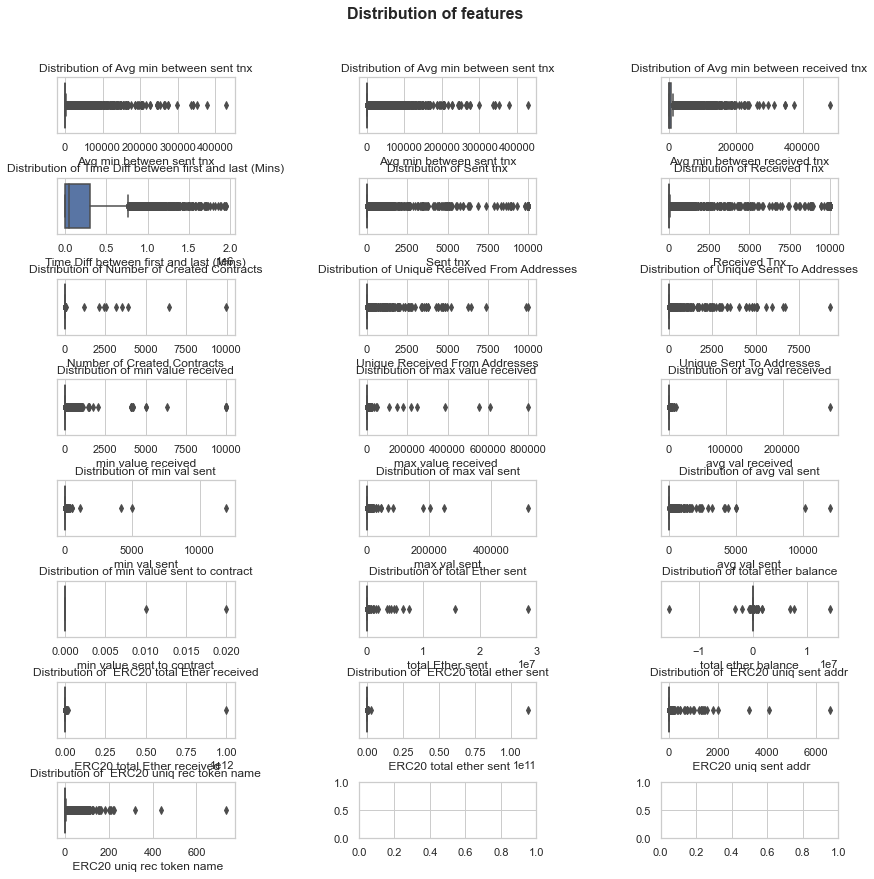

In [142]:
# Analisis de la distribucion usando boxplots
columns = ['FLAG', 'Avg min between sent tnx', 
           'Avg min between sent tnx','Avg min between received tnx',  
           'Time Diff between first and last (Mins)', 'Sent tnx', 
           'Received Tnx', 'Number of Created Contracts', 
           'Unique Received From Addresses', 'Unique Sent To Addresses', 
           'min value received', 'max value received ', 'avg val received',
           'min val sent', 'max val sent', 'avg val sent',
           'min value sent to contract', 'total Ether sent', 
           'total ether balance', ' ERC20 total Ether received', 
           ' ERC20 total ether sent', ' ERC20 uniq sent addr', ' ERC20 uniq rec token name']

       

fig, axes = plt.subplots(8, 3, figsize=(14, 14), constrained_layout =True)
plt.subplots_adjust(wspace = 0.7, hspace=0.8)
plt.suptitle("Distribution of features",y=0.95, size=16, weight='bold')

ax = sns.boxplot(ax = axes[0,0], data=df_copy, x=columns[1])
ax.set_title(f'Distribution of {columns[1]}')

ax1 = sns.boxplot(ax = axes[0,1], data=df_copy, x=columns[2])
ax1.set_title(f'Distribution of {columns[2]}')

ax2 = sns.boxplot(ax = axes[0,2], data=df_copy, x=columns[3])
ax2.set_title(f'Distribution of {columns[3]}')

ax3 = sns.boxplot(ax = axes[1,0], data=df_copy, x=columns[4])
ax3.set_title(f'Distribution of {columns[4]}')

ax4 = sns.boxplot(ax = axes[1,1], data=df_copy, x=columns[5])
ax4.set_title(f'Distribution of {columns[5]}')

ax5 = sns.boxplot(ax = axes[1,2], data=df_copy, x=columns[6])
ax5.set_title(f'Distribution of {columns[6]}')

ax6 = sns.boxplot(ax = axes[2,0], data=df_copy, x=columns[7])
ax6.set_title(f'Distribution of {columns[7]}')

ax7 = sns.boxplot(ax = axes[2,1], data=df_copy, x=columns[8])
ax7.set_title(f'Distribution of {columns[8]}')

ax8 = sns.boxplot(ax = axes[2,2], data=df_copy, x=columns[9])
ax8.set_title(f'Distribution of {columns[9]}')

ax9 = sns.boxplot(ax = axes[3,0], data=df_copy, x=columns[10])
ax9.set_title(f'Distribution of {columns[10]}')
 
ax10 = sns.boxplot(ax = axes[3,1], data=df_copy, x=columns[11])
ax10.set_title(f'Distribution of {columns[11]}')

ax11 = sns.boxplot(ax = axes[3,2], data=df_copy, x=columns[12])
ax11.set_title(f'Distribution of {columns[12]}')
 
ax12 = sns.boxplot(ax = axes[4,0], data=df_copy, x=columns[13])
ax12.set_title(f'Distribution of {columns[13]}')
 
ax13 = sns.boxplot(ax = axes[4,1], data=df_copy, x=columns[14])
ax13.set_title(f'Distribution of {columns[14]}')
 
ax14 = sns.boxplot(ax = axes[4,2], data=df_copy, x=columns[15])
ax14.set_title(f'Distribution of {columns[15]}')
 
ax15 = sns.boxplot(ax = axes[5,0], data=df_copy, x=columns[16])
ax15.set_title(f'Distribution of {columns[16]}')

ax15 = sns.boxplot(ax = axes[5,1], data=df_copy, x=columns[17])
ax15.set_title(f'Distribution of {columns[17]}')

ax15 = sns.boxplot(ax = axes[5,2], data=df_copy, x=columns[18])
ax15.set_title(f'Distribution of {columns[18]}')

ax15 = sns.boxplot(ax = axes[6,0], data=df_copy, x=columns[19])
ax15.set_title(f'Distribution of {columns[19]}')

ax15 = sns.boxplot(ax = axes[6,1], data=df_copy, x=columns[20])
ax15.set_title(f'Distribution of {columns[20]}')

ax15 = sns.boxplot(ax = axes[6,2], data=df_copy, x=columns[21])
ax15.set_title(f'Distribution of {columns[21]}')

ax15 = sns.boxplot(ax = axes[7,0], data=df_copy, x=columns[22])
ax15.set_title(f'Distribution of {columns[22]}')
 

plt.show()

# Analisis Bivariado


<AxesSubplot:xlabel='FLAG', ylabel=' ERC20 min val rec'>

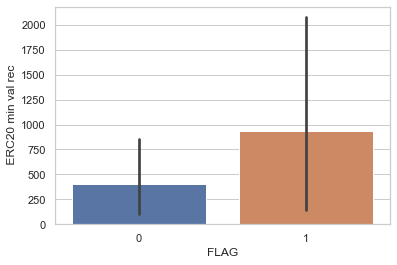

In [106]:
# FLAG VS ERC20 min val rec
sns.barplot(x='FLAG' , y = " ERC20 min val rec", data=df)

<AxesSubplot:xlabel='FLAG', ylabel=' ERC20 max val rec'>

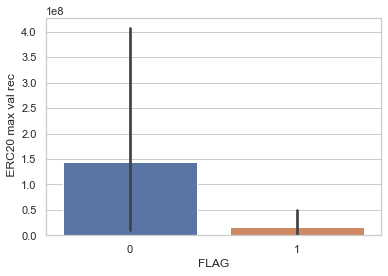

In [107]:
# Flag vs ERC20 max val rec
sns.barplot(x='FLAG' , y = " ERC20 max val rec", data=df)

<AxesSubplot:xlabel='FLAG', ylabel=' ERC20 avg val rec'>

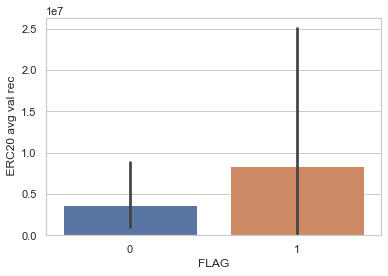

In [108]:
#Flag vs ERC20 avg val rec
sns.barplot(x='FLAG' , y = " ERC20 avg val rec", data=df)

<AxesSubplot:xlabel='FLAG', ylabel=' ERC20 min val sent'>

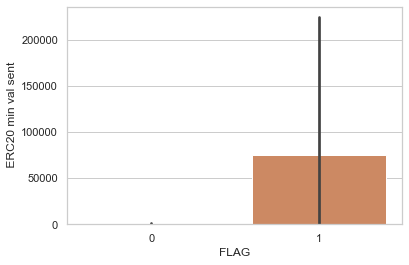

In [109]:
# Flag vs ER20 MIN VAL SENT
sns.barplot(x='FLAG' , y = " ERC20 min val sent", data=df)

<AxesSubplot:xlabel='FLAG', ylabel=' ERC20 max val sent'>

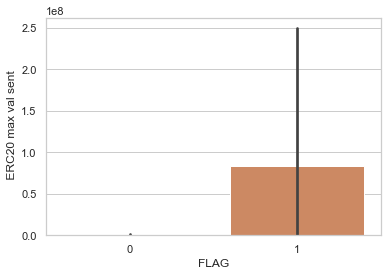

In [110]:
# Flag vs ERC20 max val sent
sns.barplot(x='FLAG' , y = " ERC20 max val sent", data=df)

<AxesSubplot:xlabel='FLAG', ylabel=' ERC20 avg val sent'>

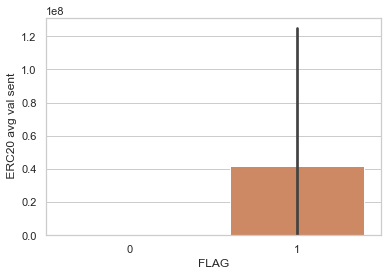

In [111]:
#FLAG vs ERC20 avg val sent
sns.barplot(x='FLAG' , y = " ERC20 avg val sent", data=df)

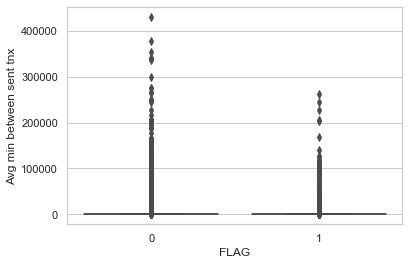

In [143]:
sns.boxplot(x='FLAG', y='Avg min between sent tnx', data=df)

plt.show()

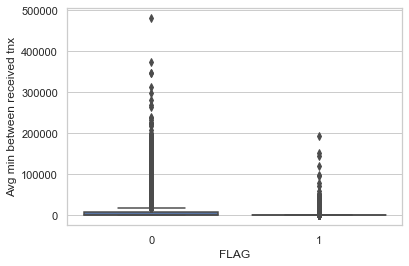

In [144]:
sns.boxplot(x='FLAG', y='Avg min between received tnx', data=df)

plt.show()

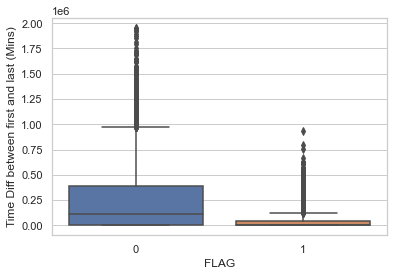

In [145]:
sns.boxplot(x='FLAG', y='Time Diff between first and last (Mins)', data=df)

plt.show()

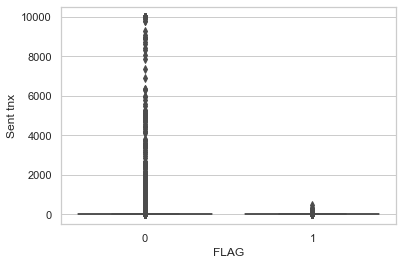

In [146]:
sns.boxplot(x='FLAG', y='Sent tnx', data=df)

plt.show()

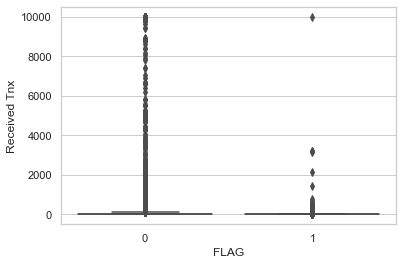

In [147]:
sns.boxplot(x='FLAG', y='Received Tnx', data=df)

plt.show()

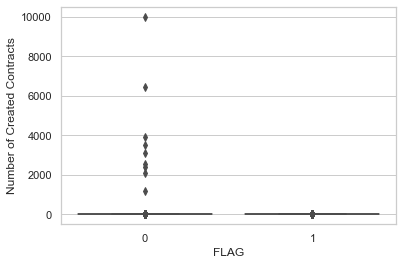

In [148]:
sns.boxplot(x='FLAG', y='Number of Created Contracts', data=df)

plt.show()

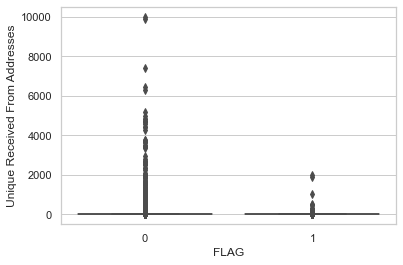

In [149]:
sns.boxplot(x='FLAG', y='Unique Received From Addresses', data=df)

plt.show() 

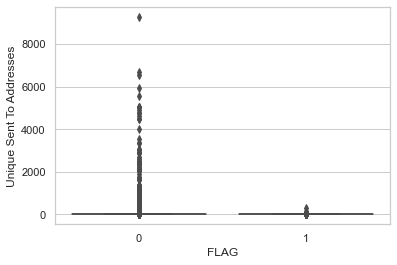

In [150]:
sns.boxplot(x='FLAG', y='Unique Sent To Addresses', data=df)

plt.show() 

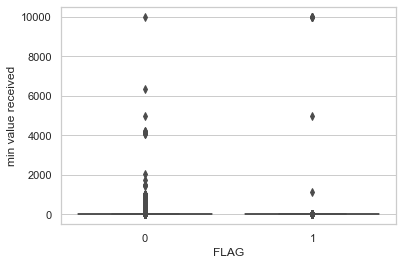

In [151]:
sns.boxplot(x='FLAG', y='min value received', data=df)

plt.show() 

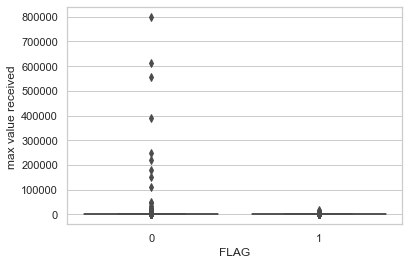

In [152]:
sns.boxplot(x='FLAG', y='max value received ', data=df)

plt.show() 

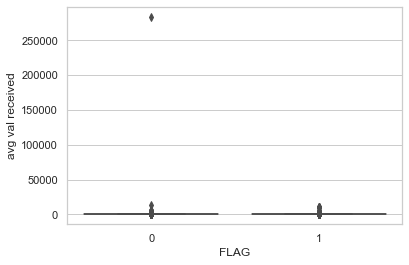

In [153]:
sns.boxplot(x='FLAG', y='avg val received', data=df)

plt.show() 

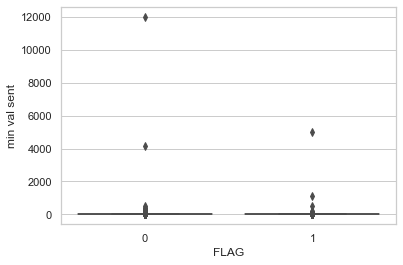

In [154]:
sns.boxplot(x='FLAG', y='min val sent', data=df)

plt.show() 

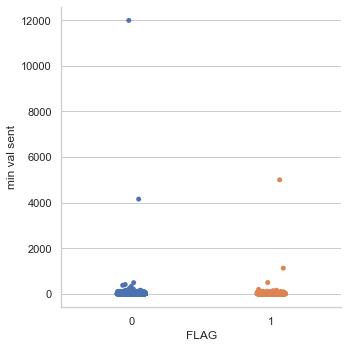

In [155]:
sns.catplot(x='FLAG', y='min val sent', data=df)

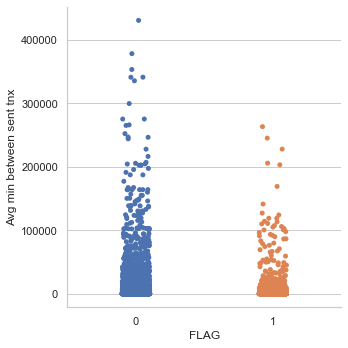

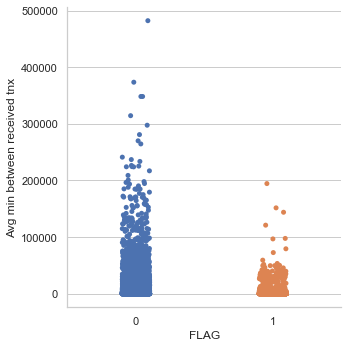

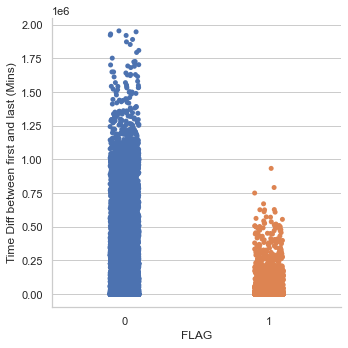

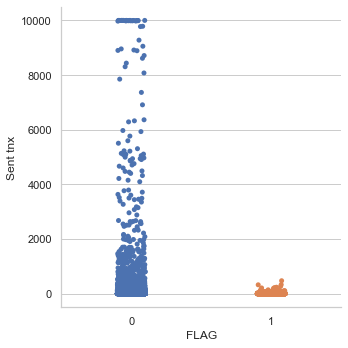

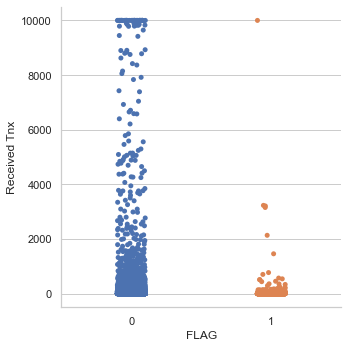

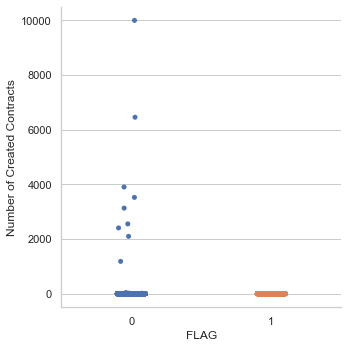

In [156]:
sns.catplot(x='FLAG', y='Avg min between sent tnx', data=df)

plt.show()

sns.catplot(x='FLAG', y='Avg min between received tnx', data=df)

plt.show()

sns.catplot(x='FLAG', y='Time Diff between first and last (Mins)', data=df)

plt.show()

sns.catplot(x='FLAG', y='Sent tnx', data=df)

plt.show()

sns.catplot(x='FLAG', y='Received Tnx', data=df)

plt.show()

sns.catplot(x='FLAG', y='Number of Created Contracts', data=df)

plt.show()



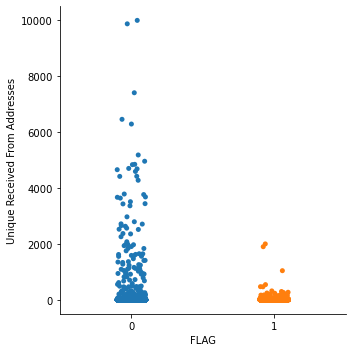

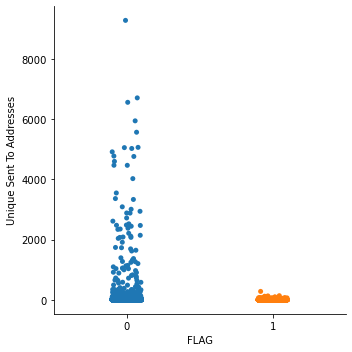

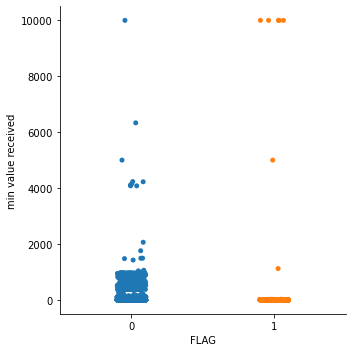

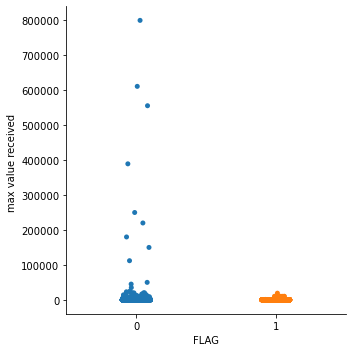

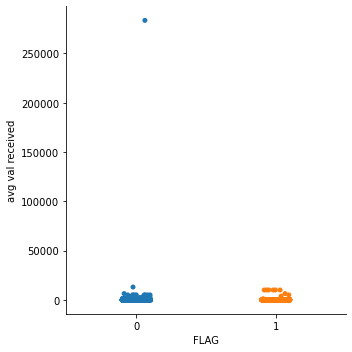

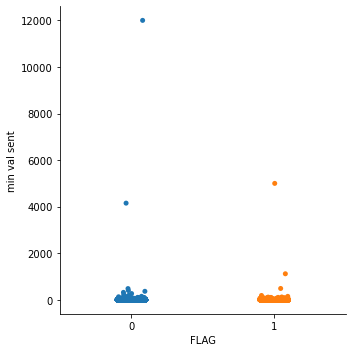

In [65]:
sns.catplot(x='FLAG', y='Unique Received From Addresses', data=df)
plt.show() 

sns.catplot(x='FLAG', y='Unique Sent To Addresses', data=df)
plt.show() 

sns.catplot(x='FLAG', y='min value received', data=df)
plt.show() 

sns.catplot(x='FLAG', y='max value received ', data=df)
plt.show() 

sns.catplot(x='FLAG', y='avg val received', data=df)
plt.show() 

sns.catplot(x='FLAG', y='min val sent', data=df)
plt.show() 

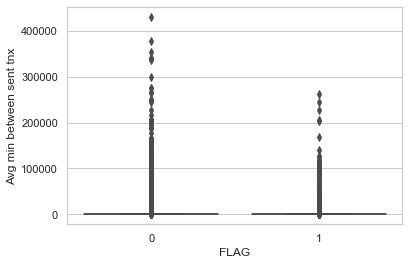

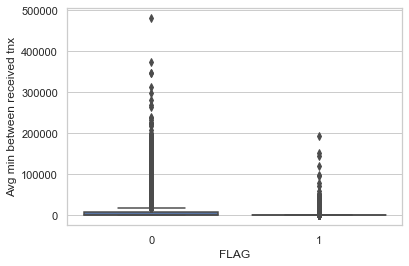

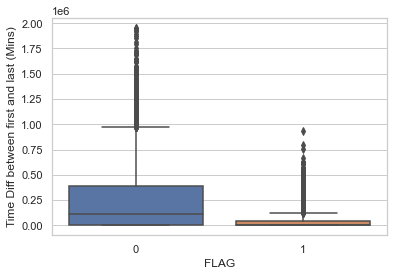

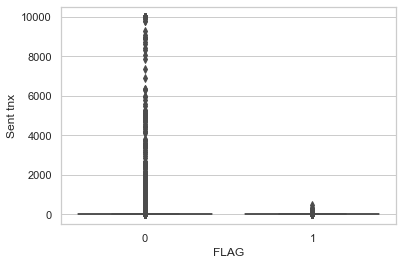

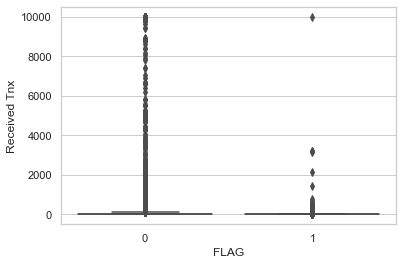

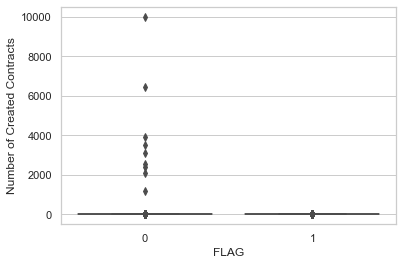

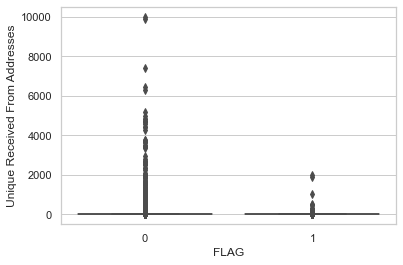

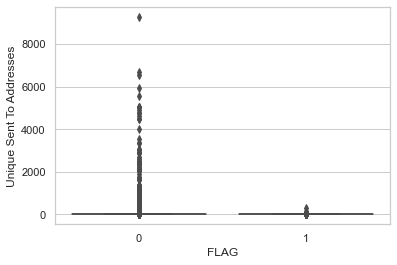

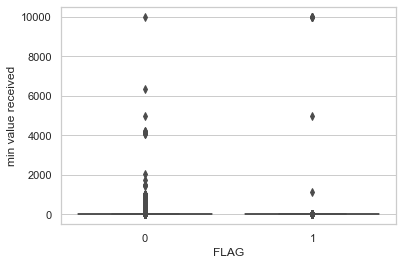

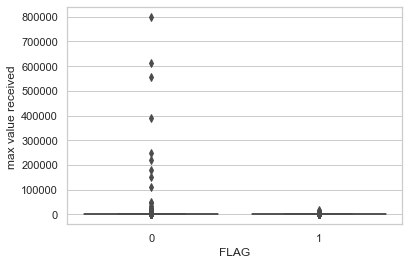

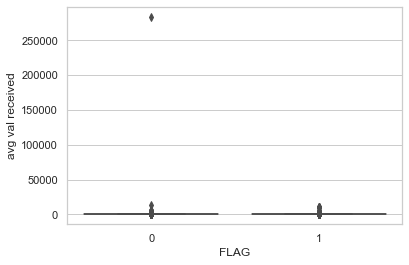

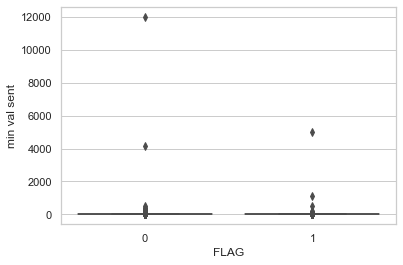

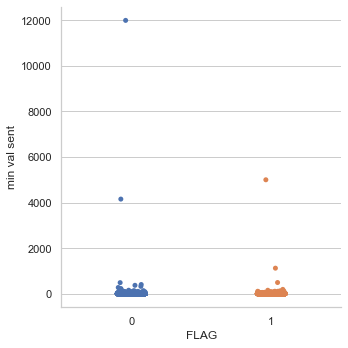

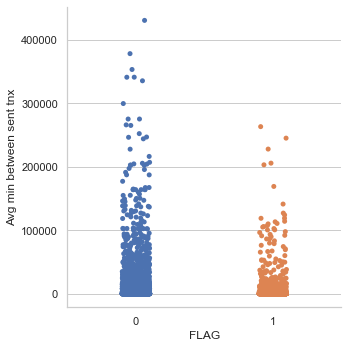

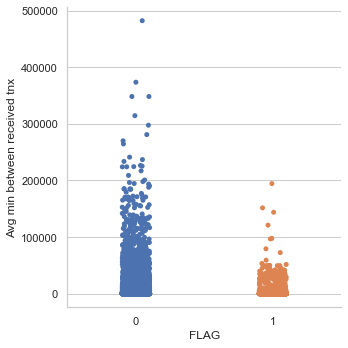

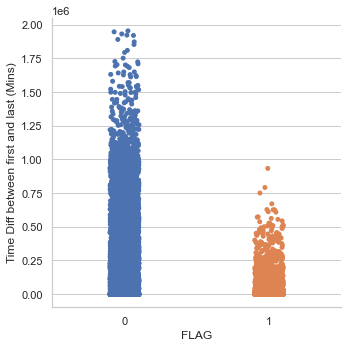

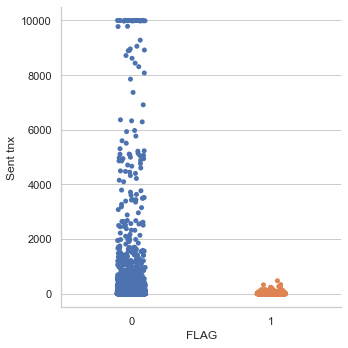

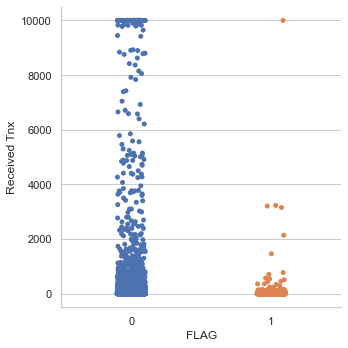

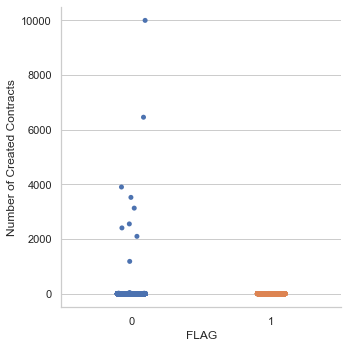

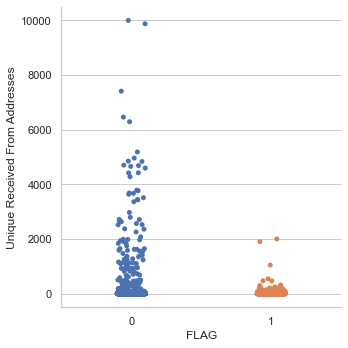

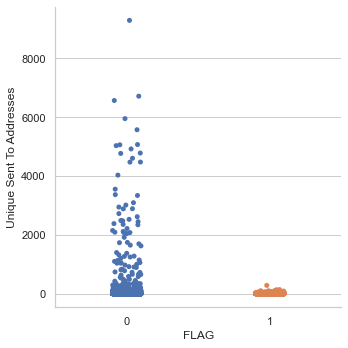

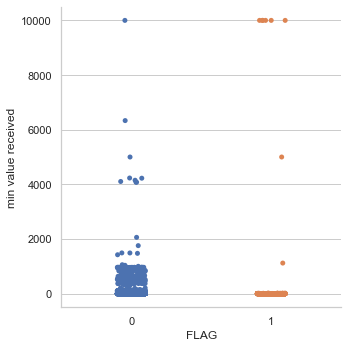

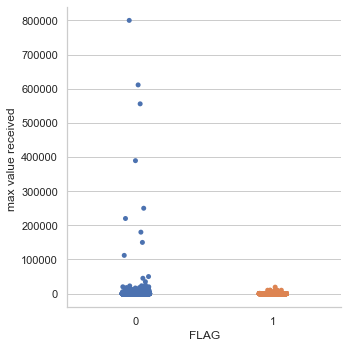

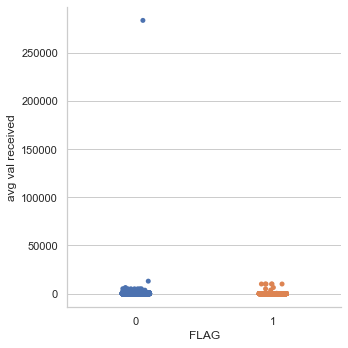

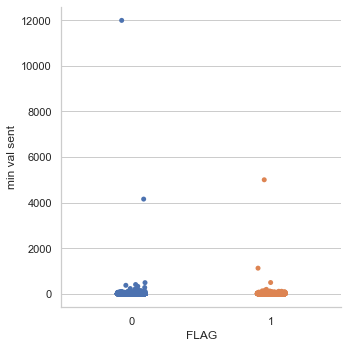

In [157]:
sns.boxplot(x='FLAG', y='Avg min between sent tnx', data=df)

plt.show()

sns.boxplot(x='FLAG', y='Avg min between received tnx', data=df)

plt.show()

sns.boxplot(x='FLAG', y='Time Diff between first and last (Mins)', data=df)

plt.show()

sns.boxplot(x='FLAG', y='Sent tnx', data=df)

plt.show()

sns.boxplot(x='FLAG', y='Received Tnx', data=df)

plt.show()

sns.boxplot(x='FLAG', y='Number of Created Contracts', data=df)

plt.show()

sns.boxplot(x='FLAG', y='Unique Received From Addresses', data=df)

plt.show() 

sns.boxplot(x='FLAG', y='Unique Sent To Addresses', data=df)

plt.show() 

sns.boxplot(x='FLAG', y='min value received', data=df)

plt.show() 

sns.boxplot(x='FLAG', y='max value received ', data=df)

plt.show() 

sns.boxplot(x='FLAG', y='avg val received', data=df)

plt.show() 

sns.boxplot(x='FLAG', y='min val sent', data=df)

plt.show() 

sns.catplot(x='FLAG', y='min val sent', data=df)

sns.catplot(x='FLAG', y='Avg min between sent tnx', data=df)

plt.show()

sns.catplot(x='FLAG', y='Avg min between received tnx', data=df)

plt.show()

sns.catplot(x='FLAG', y='Time Diff between first and last (Mins)', data=df)

plt.show()

sns.catplot(x='FLAG', y='Sent tnx', data=df)

plt.show()

sns.catplot(x='FLAG', y='Received Tnx', data=df)

plt.show()

sns.catplot(x='FLAG', y='Number of Created Contracts', data=df)

plt.show()



sns.catplot(x='FLAG', y='Unique Received From Addresses', data=df)
plt.show() 

sns.catplot(x='FLAG', y='Unique Sent To Addresses', data=df)
plt.show() 

sns.catplot(x='FLAG', y='min value received', data=df)
plt.show() 

sns.catplot(x='FLAG', y='max value received ', data=df)
plt.show() 

sns.catplot(x='FLAG', y='avg val received', data=df)
plt.show() 

sns.catplot(x='FLAG', y='min val sent', data=df)
plt.show() 

# Analisis Multivariado

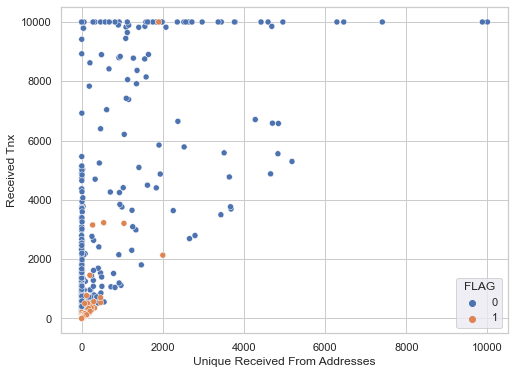

In [112]:
plt.subplots(figsize = (8, 6))
sns.set(style = 'darkgrid')
sns.scatterplot(data = df,x = 'Unique Received From Addresses', y= 'Received Tnx',hue = 'FLAG' )
plt.show()

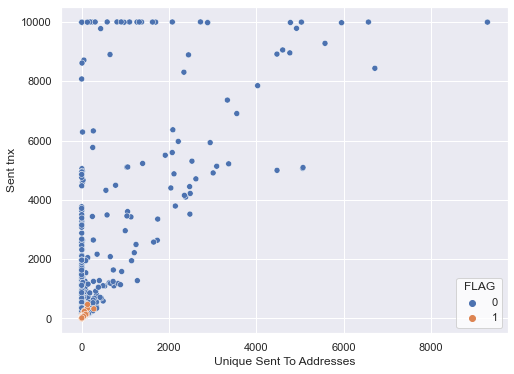

In [113]:
plt.subplots(figsize = (8, 6))
sns.set(style = 'whitegrid')
sns.scatterplot(data = df,x = 'Unique Sent To Addresses', y= 'Sent tnx',hue = 'FLAG' )
plt.show()

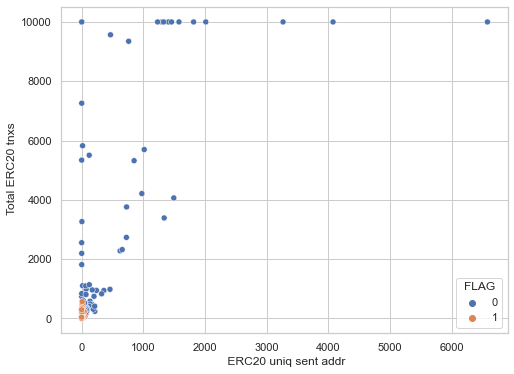

In [114]:
plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df,x = ' ERC20 uniq sent addr', y= ' Total ERC20 tnxs',hue = 'FLAG' )
plt.show()


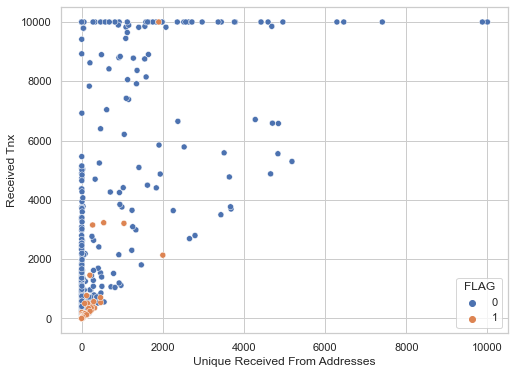

In [115]:
plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df,x = 'Unique Received From Addresses', y= 'Received Tnx',hue = 'FLAG' )
plt.show()

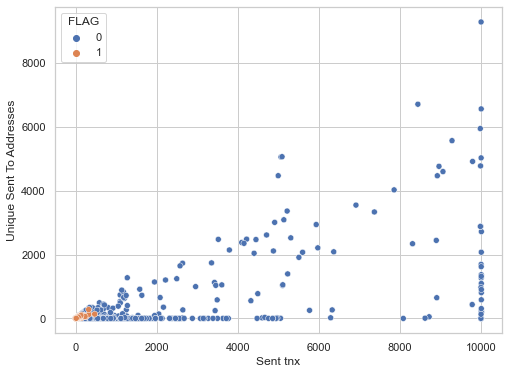

In [116]:
plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df,x = 'Sent tnx', y= 'Unique Sent To Addresses',hue = 'FLAG' )
plt.show()

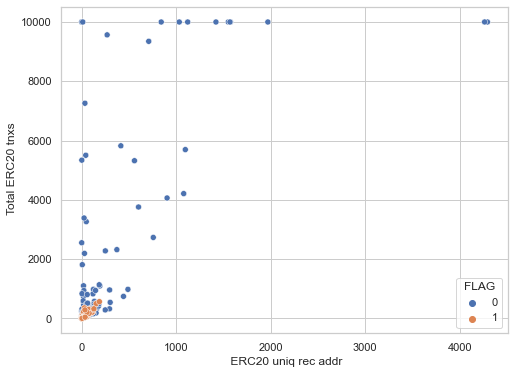

In [117]:
plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df,x = ' ERC20 uniq rec addr', y= ' Total ERC20 tnxs',hue = 'FLAG' )
plt.show()

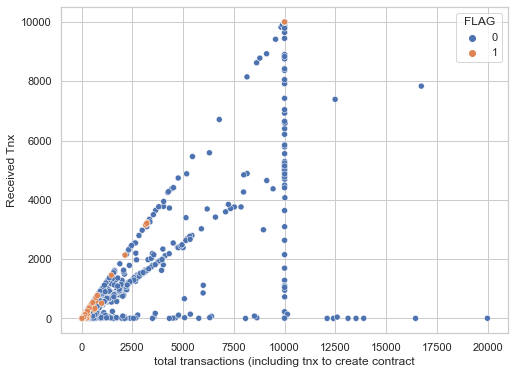

In [118]:
plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df,x = 'total transactions (including tnx to create contract', y= 'Received Tnx',hue = 'FLAG' )
plt.show()

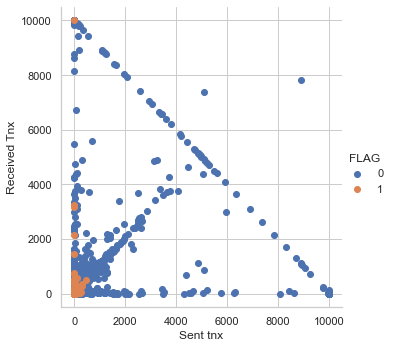

In [119]:
#Analizo la variable target vs los envios de trx y las recividas
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter,'Sent tnx','Received Tnx').add_legend();


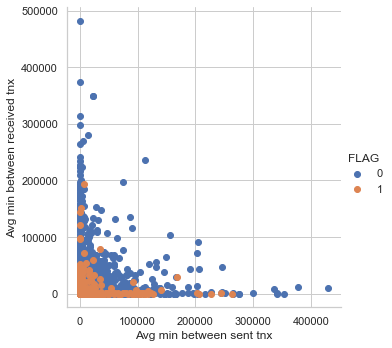

In [120]:
#Analizo la variable targer vs el promedio minimo de enviados y recibidos
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter,'Avg min between sent tnx','Avg min between received tnx').add_legend();

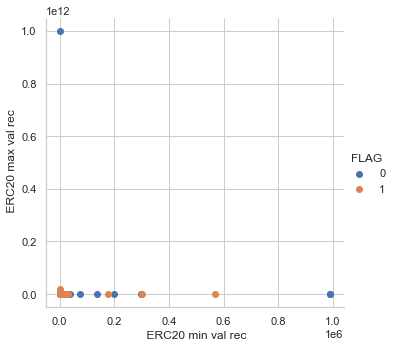

In [121]:
#Analizo la variable target vs ERC20 min val rec y ERC20 max val rec
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter,' ERC20 min val rec',' ERC20 max val rec').add_legend();

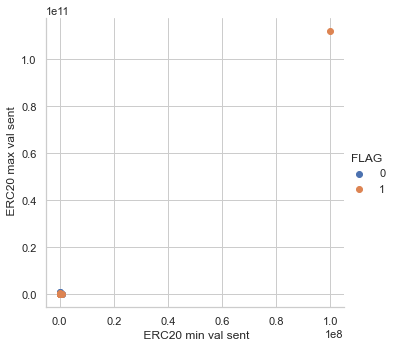

In [122]:
#Analizo la variable target vs ERC20 min val sent y ERC20 max val sent
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter, ' ERC20 min val sent',' ERC20 max val sent').add_legend();


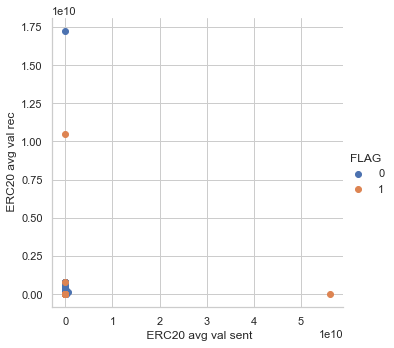

In [123]:
#Analizo la variable target vs ERC20 avg val sent y ERC20 avg val rec
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter, ' ERC20 avg val sent',' ERC20 avg val rec').add_legend();


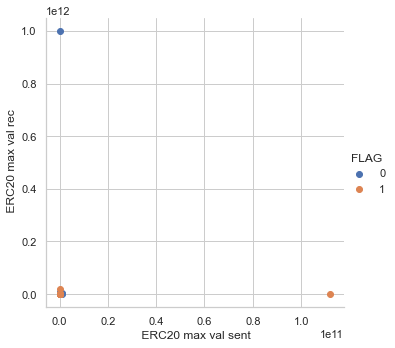

In [124]:
#Analizo la variable target vs ERC20 max val sent y ERC20 max val rec
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter, ' ERC20 max val sent',' ERC20 max val rec').add_legend();

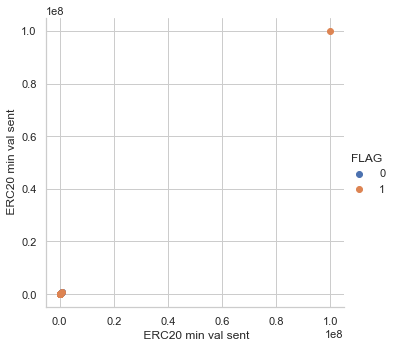

In [125]:
#Analizo la variable target vs ERC20 min val sent y ERC20 min val rec
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter, ' ERC20 min val sent',' ERC20 min val sent').add_legend();

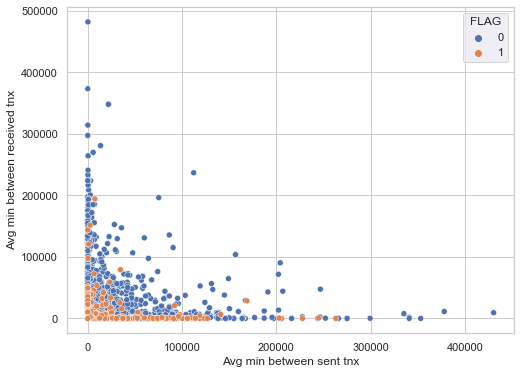

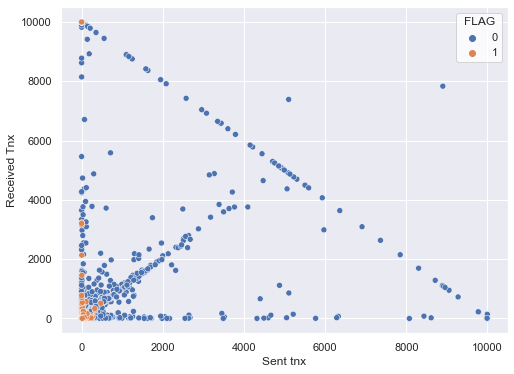

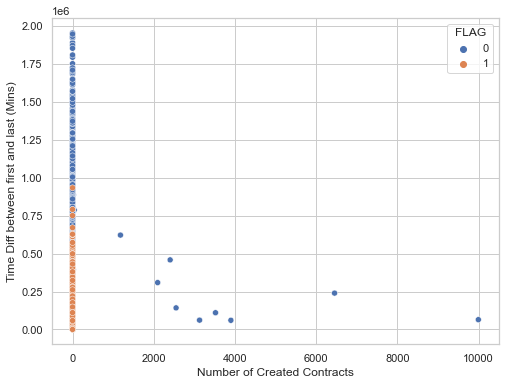

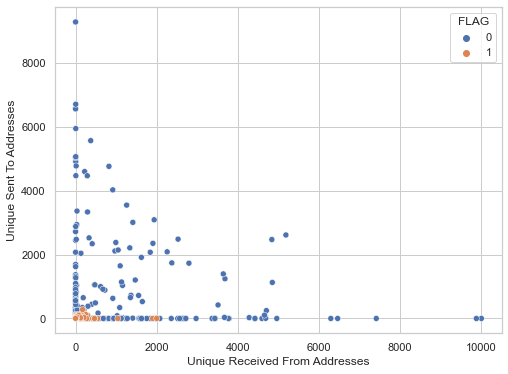

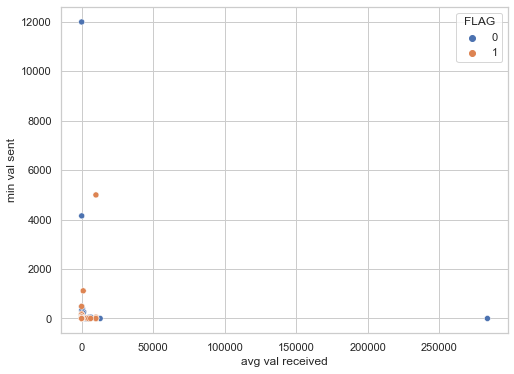

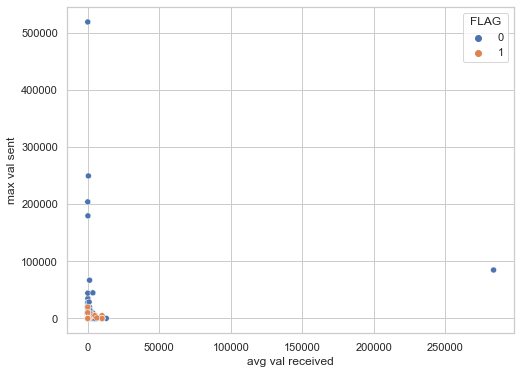

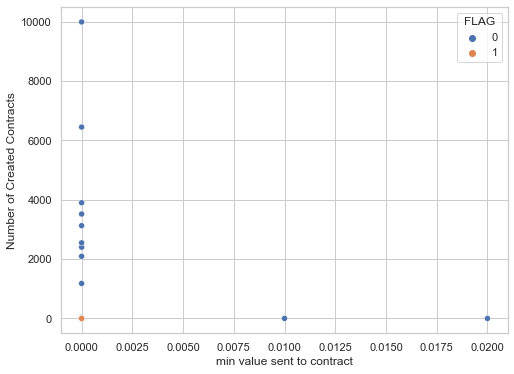

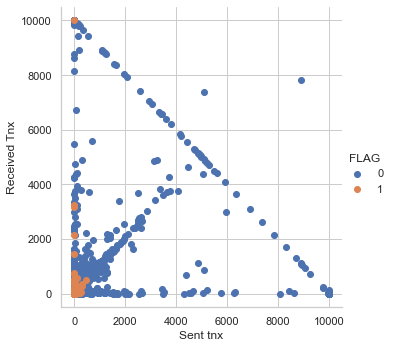

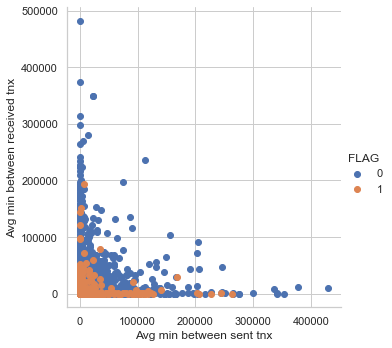

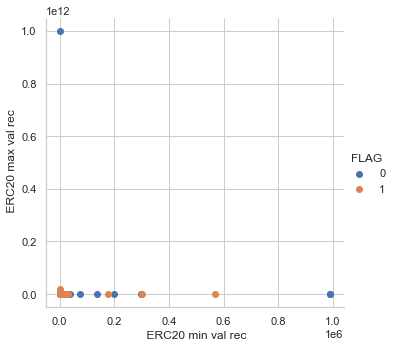

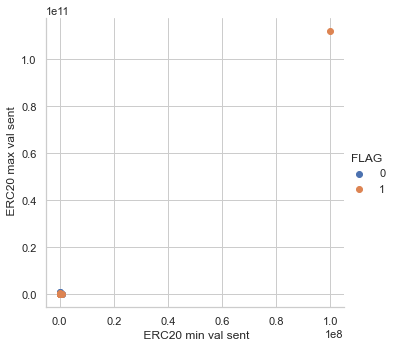

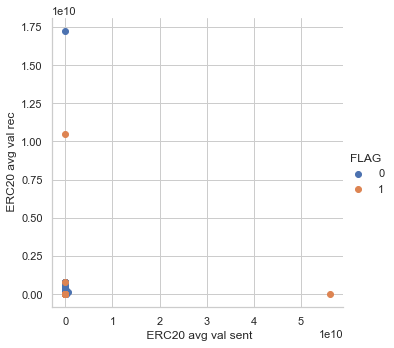

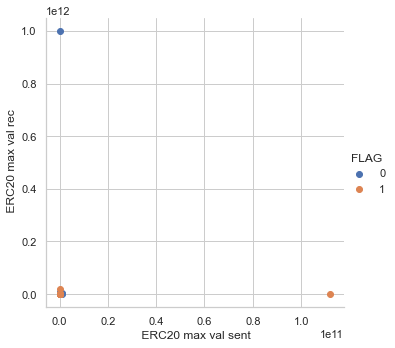

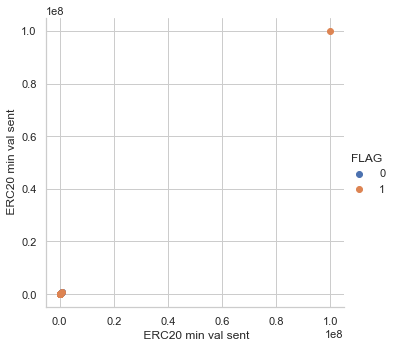

In [158]:
#Comienzo a Analizar  las sigueintes variables
#'Avg min between sent tnx',
#'Avg min between received tnx', 

# 'Time Diff between first and last (Mins)', 

#'Sent tnx', 'Received Tnx',        
#'Number of Created Contracts', 
#'Unique Received From Addresses',
#'Unique Sent To Addresses', 
#'min value received', 
#'max value received ',  
#'avg val received', 
#'min val sent', 
#'max val sent', 
#'avg val sent',        
#'min value sent to contract'

plt.subplots(figsize = (8, 6))
sns.set(style = 'darkgrid')
sns.scatterplot(data = df,x = 'Avg min between sent tnx', y= 'Avg min between received tnx',hue = 'FLAG' )
plt.show()

plt.subplots(figsize = (8, 6))
sns.set(style = 'whitegrid')
sns.scatterplot(data = df,x = 'Sent tnx', y= 'Received Tnx',hue = 'FLAG' )
plt.show()

plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df,x = 'Number of Created Contracts', y= 'Time Diff between first and last (Mins)',hue = 'FLAG' )
plt.show()


plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df,x = 'Unique Received From Addresses', y= 'Unique Sent To Addresses',hue = 'FLAG' )
plt.show()

plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df,x = 'avg val received', y= 'min val sent',hue = 'FLAG' )
plt.show()

plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df,x = 'avg val received', y= 'max val sent',hue = 'FLAG' )
plt.show()

plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df,x = 'min value sent to contract', y= 'Number of Created Contracts',hue = 'FLAG' )
plt.show()

#Analizo la variable target vs los envios de trx y las recividas
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter,'Sent tnx','Received Tnx').add_legend();


#Analizo la variable targer vs el promedio minimo de enviados y recibidos
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter,'Avg min between sent tnx','Avg min between received tnx').add_legend();

#Analizo la variable target vs ERC20 min val rec y ERC20 max val rec
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter,' ERC20 min val rec',' ERC20 max val rec').add_legend();

#Analizo la variable target vs ERC20 min val sent y ERC20 max val sent
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter, ' ERC20 min val sent',' ERC20 max val sent').add_legend();


#Analizo la variable target vs ERC20 avg val sent y ERC20 avg val rec
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter, ' ERC20 avg val sent',' ERC20 avg val rec').add_legend();


#Analizo la variable target vs ERC20 max val sent y ERC20 max val rec
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter, ' ERC20 max val sent',' ERC20 max val rec').add_legend();

#Analizo la variable target vs ERC20 min val sent y ERC20 min val rec
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter, ' ERC20 min val sent',' ERC20 min val sent').add_legend();

# Veo la concentracion de las variables 

'Avg min between sent tnx',
'Avg min between received tnx', 
'Time Diff between first and last (Mins)', 
'Sent tnx', 'Received Tnx',        
'Number of Created Contracts', 
'Unique Received From Addresses',
'Unique Sent To Addresses', 
'min value received', 
'max value received ',  
'avg val received', 
'min val sent', 
'max val sent', 
'avg val sent',        
'min value sent to contract'

In [159]:
df['Received Tnx'].describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99]) #Para verlo por deciles + el extremo 99% que en este escenario es util



count     9841.000000
mean       163.700945
std        940.836550
min          0.000000
1%           0.000000
10%          1.000000
20%          1.000000
30%          2.000000
40%          2.000000
50%          4.000000
60%          8.000000
70%         17.000000
80%         44.000000
90%        139.000000
99%       4901.000000
max      10000.000000
Name: Received Tnx, dtype: float64

In [174]:
df['min val sent'].describe([.01,.1,.2,.3,.4,.5,.6,.7,.75,.8,.9,.99]) #Para verlo por deciles + el extremo 99% que en este escenario es util


count     9841.000000
mean         4.800090
std        138.609682
min          0.000000
1%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.001586
50%          0.049126
60%          0.195462
70%          0.553312
75%          0.998800
80%          1.144326
90%          4.985680
99%         44.725274
max      12000.000000
Name: min val sent, dtype: float64

In [175]:
df['min value received'].describe([.01,.1,.2,.3,.4,.5,.6,.7,.75,.8,.9,.99])

count     9841.000000
mean        43.845153
std        325.929139
min          0.000000
1%           0.000000
10%          0.000000
20%          0.000000
30%          0.005000
40%          0.020000
50%          0.095856
60%          0.274811
70%          1.000000
75%          2.000000
80%          7.100000
90%        101.000000
99%        893.138997
max      10000.000000
Name: min value received, dtype: float64

In [162]:
df['avg val received'].describe([.01,.1,.2,.3,.4,.5,.6,.7,.75,.8,.9,.99])

count      9841.000000
mean        100.711721
std        2885.002236
min           0.000000
1%            0.000000
10%           0.049187
20%           0.259342
30%           0.586842
40%           0.995000
50%           1.729730
60%           3.838320
70%          10.560000
75%          22.000000
80%          50.500000
90%         101.000000
99%        1000.500000
max      283618.831600
Name: avg val received, dtype: float64

In [163]:
df['max value received '].describe([.01,.1,.2,.3,.4,.5,.6,.7,.75,.8,.9,.99])
 

count      9841.000000
mean        523.152481
std       13008.821539
min           0.000000
1%            0.000000
10%           0.079107
20%           0.589050
30%           1.082908
40%           2.697300
50%           6.000000
60%          13.940000
70%          48.359000
75%          67.067040
80%          95.212547
90%         127.300000
99%        2935.353765
max      800000.000000
Name: max value received , dtype: float64

In [164]:
df['Sent tnx'].describe([.01,.1,.2,.3,.4,.5,.6,.7,.75,.8,.9,.99])

count     9841.000000
mean       115.931714
std        757.226361
min          0.000000
1%           0.000000
10%          0.000000
20%          0.000000
30%          1.000000
40%          2.000000
50%          3.000000
60%          3.000000
70%          7.000000
75%         11.000000
80%         17.000000
90%         86.000000
99%       3118.000000
max      10000.000000
Name: Sent tnx, dtype: float64

In [165]:
df['Avg min between sent tnx'].describe([.01,.1,.2,.3,.4,.5,.6,.7,.75,.8,.9,.99])

count      9841.000000
mean       5086.878721
std       21486.549974
min           0.000000
1%            0.000000
10%           0.000000
20%           0.000000
30%           0.000000
40%           2.870000
50%          17.340000
60%          63.000000
70%         164.070000
75%         565.470000
80%        1803.320000
90%        9454.070000
99%      103077.210000
max      430287.670000
Name: Avg min between sent tnx, dtype: float64

In [166]:
df['Avg min between received tnx'].describe([.01,.1,.2,.3,.4,.5,.6,.7,.75,.8,.9,.99])

count      9841.000000
mean       8004.851184
std       23081.714801
min           0.000000
1%            0.000000
10%           0.000000
20%           0.000000
30%           0.160000
40%          26.820000
50%         509.770000
60%        1715.890000
70%        3718.750000
75%        5480.390000
80%        8125.400000
90%       21054.310000
99%      123244.134000
max      482175.490000
Name: Avg min between received tnx, dtype: float64

In [167]:
df['Time Diff between first and last (Mins)'].describe([.01,.1,.2,.3,.4,.5,.6,.7,.75,.8,.9,.99]).apply(lambda x: format(x, 'f')) #Para evitar notación científica

count       9841.000000
mean      218333.257652
std       322937.925740
min            0.000000
1%             0.000000
10%            6.320000
20%           70.130000
30%          326.550000
40%         7246.200000
50%        46637.030000
60%       150167.220000
70%       232149.930000
75%       304070.980000
80%       390864.550000
90%       746162.050000
99%      1282653.482000
max      1954860.950000
Name: Time Diff between first and last (Mins), dtype: object

In [168]:
df['Unique Received From Addresses'].describe([.01,.1,.2,.3,.4,.5,.6,.7,.75,.8,.9,.99])

count    9841.000000
mean       30.360939
std       298.621112
min         0.000000
1%          0.000000
10%         1.000000
20%         1.000000
30%         1.000000
40%         2.000000
50%         2.000000
60%         3.000000
70%         4.000000
75%         5.000000
80%         6.000000
90%        13.000000
99%       497.200000
max      9999.000000
Name: Unique Received From Addresses, dtype: float64

In [169]:
df['Unique Sent To Addresses'].describe([.01,.1,.2,.3,.4,.5,.6,.7,.75,.8,.9,.99])

count    9841.000000
mean       25.840159
std       263.820410
min         0.000000
1%          0.000000
10%         0.000000
20%         0.000000
30%         1.000000
40%         1.000000
50%         2.000000
60%         2.000000
70%         3.000000
75%         3.000000
80%         4.000000
90%        13.000000
99%       276.400000
max      9287.000000
Name: Unique Sent To Addresses, dtype: float64

In [176]:
# 'Avg min between sent tnx' se limpio el ultimo cuartil
# 'Avg min between received tnx' se limpio al ultimo cuartil
# 'Time Diff between first and last (Mins)' se limpio al ultimo cuartil 
# 'avg val received' se limpio el ultimo cuartil
# 'min val sent' se limpio el ultimo cuartil
# 'min value received' se limpio al ultimo cuartil
df_limpio = df[(df['Received Tnx'] <= 16) & (df['min val sent'] <= 1) & (df['min value received'] < 2) & (df['avg val received'] <= 22) & (df['max value received '] <= 101 ) & (df['Sent tnx'] <=16) & (df['Avg min between sent tnx'] < 387) & (df['Avg min between received tnx'] < 6765) & (df['Time Diff between first and last (Mins)'] < 156106 )]

Text(0.5, 1.0, 'Distribucion de la columna Target')

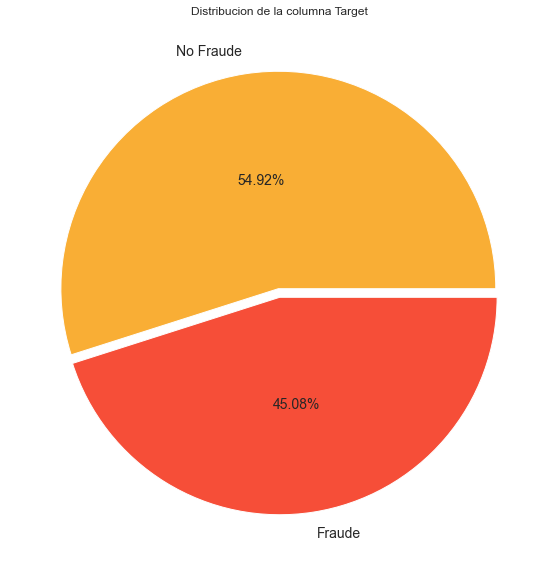

In [177]:
pie, ax = plt.subplots(figsize=[15,10])
labels = ['No Fraude', 'Fraude']
colors = ['#f9ae35', '#f64e38']
plt.pie(x = df_limpio['FLAG'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Distribucion de la columna Target')


In [178]:
df_limpio['FLAG'].value_counts()

1    888
0    729
Name: FLAG, dtype: int64

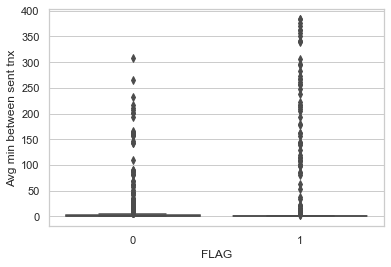

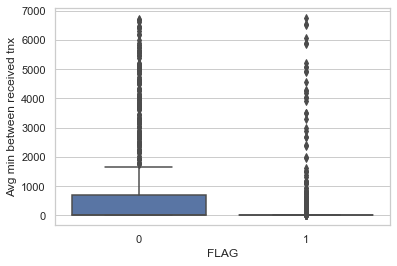

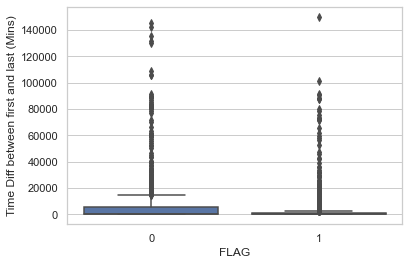

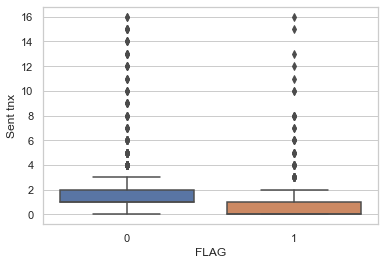

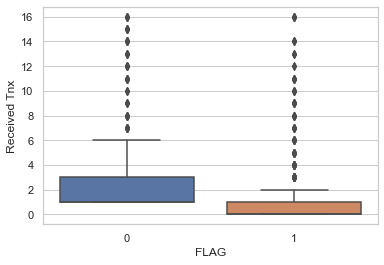

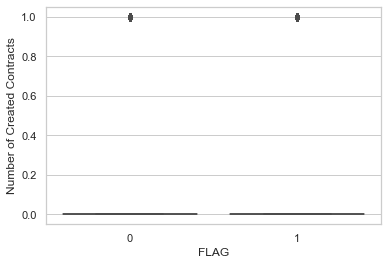

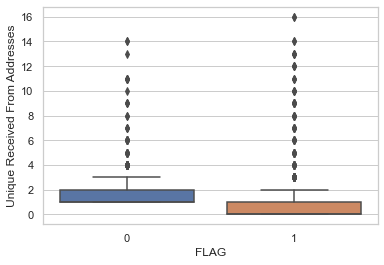

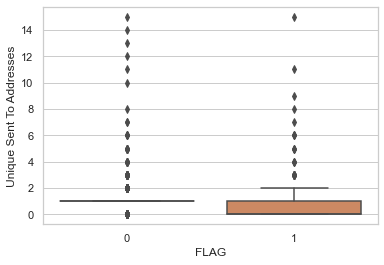

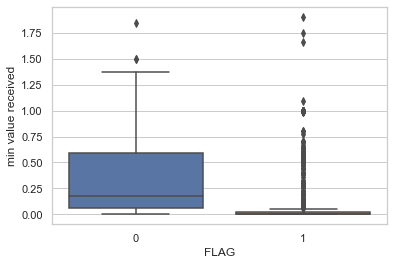

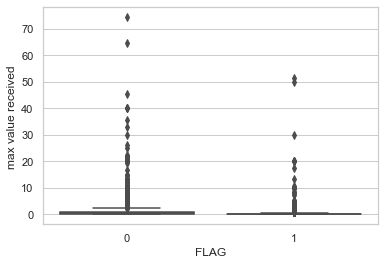

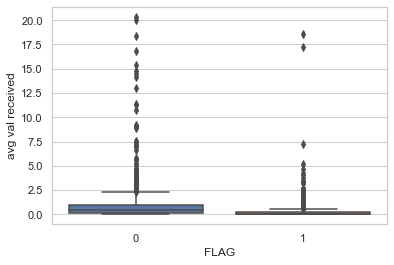

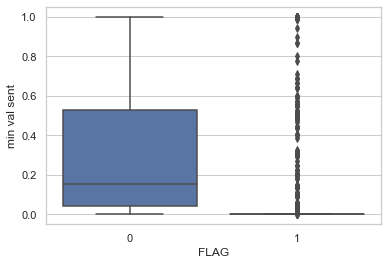

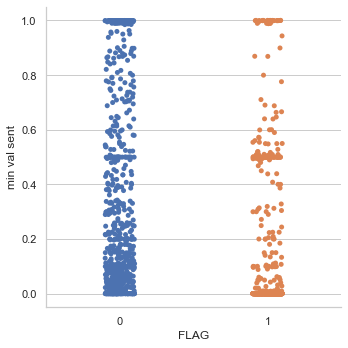

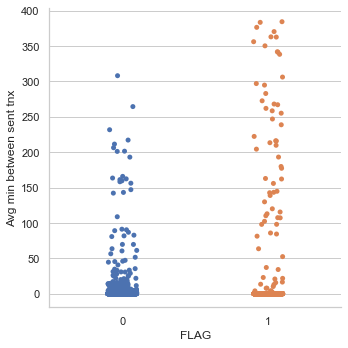

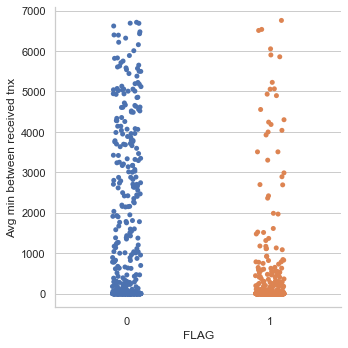

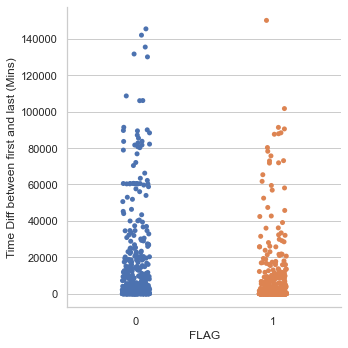

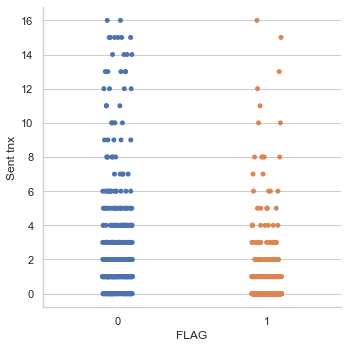

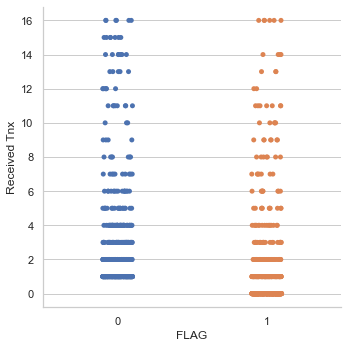

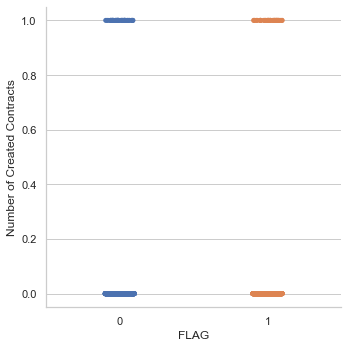

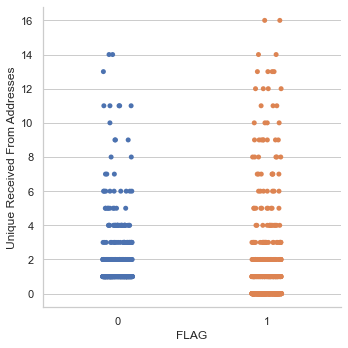

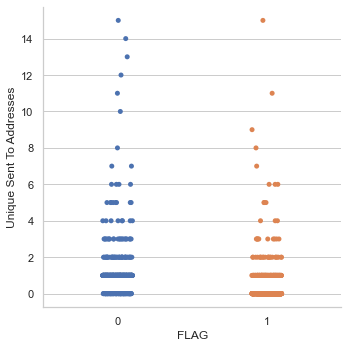

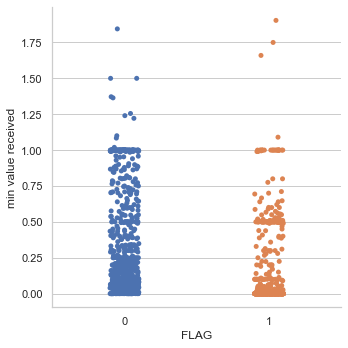

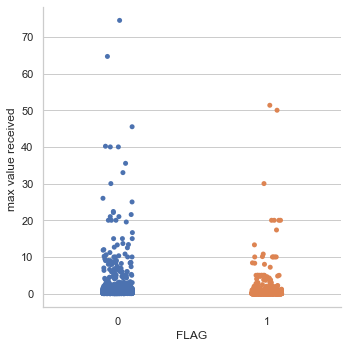

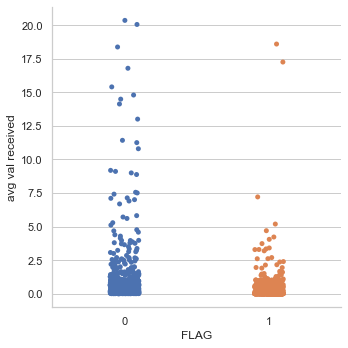

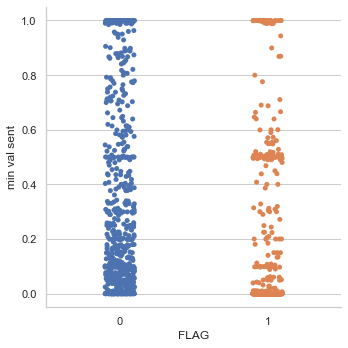

In [179]:
sns.boxplot(x='FLAG', y='Avg min between sent tnx', data=df_limpio)

plt.show()

sns.boxplot(x='FLAG', y='Avg min between received tnx', data=df_limpio)

plt.show()

sns.boxplot(x='FLAG', y='Time Diff between first and last (Mins)', data=df_limpio)

plt.show()

sns.boxplot(x='FLAG', y='Sent tnx', data=df_limpio)

plt.show()

sns.boxplot(x='FLAG', y='Received Tnx', data=df_limpio)

plt.show()

sns.boxplot(x='FLAG', y='Number of Created Contracts', data=df_limpio)

plt.show()

sns.boxplot(x='FLAG', y='Unique Received From Addresses', data=df_limpio)

plt.show() 

sns.boxplot(x='FLAG', y='Unique Sent To Addresses', data=df_limpio)

plt.show() 

sns.boxplot(x='FLAG', y='min value received', data=df_limpio)

plt.show() 

sns.boxplot(x='FLAG', y='max value received ', data=df_limpio)

plt.show() 

sns.boxplot(x='FLAG', y='avg val received', data=df_limpio)

plt.show() 

sns.boxplot(x='FLAG', y='min val sent', data=df_limpio)

plt.show() 

sns.catplot(x='FLAG', y='min val sent', data=df_limpio)

sns.catplot(x='FLAG', y='Avg min between sent tnx', data=df_limpio)

plt.show()

sns.catplot(x='FLAG', y='Avg min between received tnx', data=df_limpio)

plt.show()

sns.catplot(x='FLAG', y='Time Diff between first and last (Mins)', data=df_limpio)

plt.show()

sns.catplot(x='FLAG', y='Sent tnx', data=df_limpio)

plt.show()

sns.catplot(x='FLAG', y='Received Tnx', data=df_limpio)

plt.show()

sns.catplot(x='FLAG', y='Number of Created Contracts', data=df_limpio)

plt.show()



sns.catplot(x='FLAG', y='Unique Received From Addresses', data=df_limpio)
plt.show() 

sns.catplot(x='FLAG', y='Unique Sent To Addresses', data=df_limpio)
plt.show() 

sns.catplot(x='FLAG', y='min value received', data=df_limpio)
plt.show() 

sns.catplot(x='FLAG', y='max value received ', data=df_limpio)
plt.show() 

sns.catplot(x='FLAG', y='avg val received', data=df_limpio)
plt.show() 

sns.catplot(x='FLAG', y='min val sent', data=df_limpio)
plt.show() 

In [182]:
df_limpio.columns

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 uniq sent addr',
       ' ERC20 uniq rec addr', ' ERC20 uniq rec contract addr',
       ' ERC20 min val rec', ' ERC20 max val rec', ' ERC20 avg val rec',
       ' ERC20 min val sent', ' ERC20 max val sent', ' ERC20 avg val sent',
       ' ERC20 uniq sent token name', ' ERC20 uniq rec token name',
      

In [196]:
X.tail()

,Unnamed: 0,Index,Address,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
9832,9832,2171,0xfea28ca175a80f5a348016583961f63be8605f80,0.0,0.0,0.00,0,0,0,0,...,0.00,13.37,6.685,0.0,0.0,0.0,0.0,2.0,,Blockwell say NOTSAFU
9833,9833,2172,0xff0e20e3a7575d823302bbb27e233c23f2c3070b,0.0,0.0,0.00,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9835,9835,2174,0xff35866acb80ce4b169d1460cd48108955c1c445,0.0,0.0,8427.92,0,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9837,9837,2176,0xff718805bb9199ebf024ab6acd333e603ad77c85,0.0,0.0,0.00,0,0,0,0,...,13.37,13.37,13.370,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9839,9839,2178,0xffde23396d57e10abf58bd929bb1e856c7718218,0.0,0.0,0.00,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
